# SDA: Project

# Stock Dataseries

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import sys
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR, VARMAX
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import kstest


In [3]:
# Reading in twitter data

# Reading in News data

We can see the first 1300 rows have sentiment data, so we quantify the sentiment data for only these rows

In [4]:
    # FINANCIAL NEWS 
news = pd.read_csv('../data/us_equities_news_dataset.csv')

    # TOP 7106 COMPANIES BY MARKET CAP
market = pd.read_csv('../data/companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/us_equities_news_dataset.csv'

In [ ]:
# FIND MOST FREQUENTLY MENTIONED TICKERS
tickers = news['ticker'].value_counts()
tick_mc = market[['Rank','Symbol','marketcap']]
tick_an = pd.DataFrame({'Symbol':list(tickers.index),'Article_n':list(tickers)})
tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an.columns = ['Rank (Marketcap)','Symbol','Market Cap','Article_n']
tick_mc_an.head(n = 20)


,Rank (Marketcap),Symbol,Market Cap,Article_n
0,1,AAPL,2245746491392,20231
1,3,MSFT,1791532859392,8110
16,25,BAC,296829911040,7409
2,5,AMZN,942841135104,6330
3,7,TSLA,562562130000,4283
6,10,XOM,455235764224,2831
9,14,JPM,400557768704,2600
19,32,KO,270195392512,1367
8,12,WMT,415197298688,1267
11,17,CVX,350046846976,1105


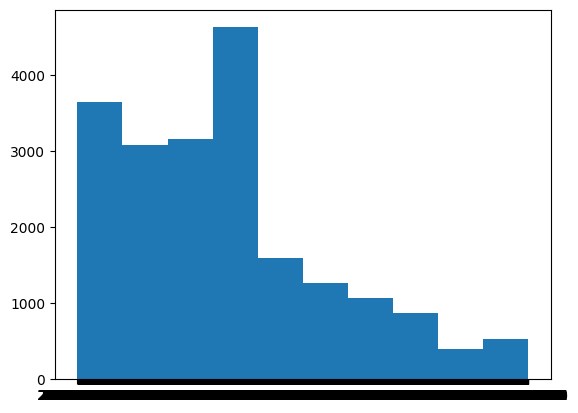

In [ ]:
apple_data = news[news['ticker'] == 'AAPL']
plt.hist(apple_data['release_date'])
plt.xticks()

max(apple_data['release_date'])[8:10]
date_max = datetime.date(int(max(apple_data['release_date'])[0:4]),int(max(apple_data['release_date'])[5:7]),int(max(apple_data['release_date'])[8:10]))
date_min = datetime.date(int(min(apple_data['release_date'])[0:4]),int(min(apple_data['release_date'])[5:7]),int(min(apple_data['release_date'])[8:10]))

In [ ]:
top_20_ranked_stocks_by_article_count = tick_mc_an.loc[:,"Symbol"].head(20)
top_20_ranked_stocks_by_article_count

0     AAPL
1     MSFT
16     BAC
2     AMZN
3     TSLA
6      XOM
9      JPM
19      KO
8      WMT
11     CVX
5      JNJ
15      HD
13      PG
18     MRK
17     PFE
12     LLY
10    NVDA
14      MA
4      UNH
7        V
Name: Symbol, dtype: object

In [ ]:
top_20_ranked_stocks_by_article_count

0     AAPL
1     MSFT
16     BAC
2     AMZN
3     TSLA
6      XOM
9      JPM
19      KO
8      WMT
11     CVX
5      JNJ
15      HD
13      PG
18     MRK
17     PFE
12     LLY
10    NVDA
14      MA
4      UNH
7        V
Name: Symbol, dtype: object

In [ ]:
#reading in the data
dataframe_stock_data = pd.read_csv(r'../data/stock_data.csv')
dataframe_stock_data

,Unnamed: 0,CVX,CVX.1,CVX.2,CVX.3,CVX.4,CVX.5,NVDA,NVDA.1,NVDA.2,...,AMZN.2,AMZN.3,AMZN.4,AMZN.5,V,V.1,V.2,V.3,V.4,V.5
0,NaN,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,91.66000366210938,92.37999725341797,91.30000305175781,91.94000244140625,57.01817321777344,7802300,3.880000114440918,3.992500066757202,3.875,...,9.060500144958496,9.211000442504883,9.211000442504883,106628000,17.600000381469727,17.729999542236328,17.547500610351562,17.6299991607666,16.184938430786133,25710000
3,2011-01-04,92.27999877929688,92.4800033569336,91.22000122070312,91.5999984741211,56.80732345581055,8513900,3.9625000953674316,3.9800000190734863,3.8550000190734863,...,9.189000129699707,9.250499725341797,9.250499725341797,100636000,17.732500076293945,17.737499237060547,17.565000534057617,17.649999618530273,16.20330047607422,18138000
4,2011-01-05,90.91999816894531,92.06999969482422,90.5,91.44000244140625,56.70808410644531,6659500,4.014999866485596,4.25,3.9749999046325684,...,9.203499794006348,9.371000289916992,9.371000289916992,68376000,17.709999084472656,18.082500457763672,17.670000076293945,18.022499084472656,16.545263290405273,38512800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,119.30999755859375,120.4000015258789,119.1500015258789,120.33000183105469,104.4437026977539,5875000,60.130001068115234,60.45249938964844,59.59749984741211,...,89.22550201416016,89.6500015258789,89.6500015258789,42728000,188.14999389648438,188.41000366210938,187.0,187.0800018310547,183.41290283203125,5831700
2261,2019-12-24,120.43000030517578,120.77999877929688,120.08999633789062,120.33999633789062,104.45237731933594,1640100,59.54999923706055,59.82749938964844,59.20500183105469,...,89.37899780273438,89.46050262451172,89.46050262451172,17626000,187.10000610351562,188.02000427246094,186.91000366210938,187.57000732421875,183.89334106445312,2420900
2262,2019-12-26,120.66999816894531,121.41999816894531,120.33999633789062,120.5999984741211,104.67803955078125,3648600,59.689998626708984,60.08000183105469,59.5,...,89.9749984741211,93.4384994506836,93.4384994506836,120108000,187.88999938964844,189.17999267578125,187.6999969482422,189.16000366210938,185.45213317871094,5237000
2263,2019-12-27,120.88999938964844,121.29000091552734,120.23999786376953,120.30000305175781,104.41765594482422,4138300,59.95000076293945,60.084999084472656,58.95249938964844,...,93.30049896240234,93.48999786376953,93.48999786376953,123732000,189.74000549316406,189.88999938964844,188.47000122070312,189.38999938964844,185.6776123046875,5448600


In [ ]:
# we only need the .4 as this is the column that holds the adjusted close, so making this loop to mask the dataframe
top_20_ranked_stocks_by_article_count = top_20_ranked_stocks_by_article_count.astype(str).values.tolist()
for i in range(len(top_20_ranked_stocks_by_article_count)):
    top_20_ranked_stocks_by_article_count[i] = top_20_ranked_stocks_by_article_count[i] +'.4'
top_20_ranked_stocks_by_article_count

['AAPL.4',
 'MSFT.4',
 'BAC.4',
 'AMZN.4',
 'TSLA.4',
 'XOM.4',
 'JPM.4',
 'KO.4',
 'WMT.4',
 'CVX.4',
 'JNJ.4',
 'HD.4',
 'PG.4',
 'MRK.4',
 'PFE.4',
 'LLY.4',
 'NVDA.4',
 'MA.4',
 'UNH.4',
 'V.4']

In [ ]:

column_indexer_adjusted_close_only = top_20_ranked_stocks_by_article_count

In [ ]:
dataframe_stock_data["Date"] = dataframe_stock_data["Unnamed: 0"]
dataframe_stock_data.columns

Index(['Unnamed: 0', 'CVX', 'CVX.1', 'CVX.2', 'CVX.3', 'CVX.4', 'CVX.5',
       'NVDA', 'NVDA.1', 'NVDA.2',
       ...
       'AMZN.3', 'AMZN.4', 'AMZN.5', 'V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5',
       'Date'],
      dtype='object', length=122)

In [ ]:
#dropping first two rows

dataframe_stock_data_selected_stocks = dataframe_stock_data[column_indexer_adjusted_close_only].loc[2:,:]
#renaming date column to be a date

dataframe_stock_data_selected_stocks

,AAPL.4,MSFT.4,BAC.4,AMZN.4,TSLA.4,XOM.4,JPM.4,KO.4,WMT.4,CVX.4,JNJ.4,HD.4,PG.4,MRK.4,PFE.4,LLY.4,NVDA.4,MA.4,UNH.4,V.4
2,10.0332612991333,21.856332778930664,12.012041091918945,9.211000442504883,1.7746670246124268,46.50217056274414,31.384624481201172,22.505250930786133,41.66514587402344,57.01817321777344,44.52234649658203,26.823223114013672,45.26420974731445,23.10027313232422,10.830879211425781,24.827224731445312,3.6297099590301514,20.722257614135742,31.065296173095703,16.184938430786133
3,10.085627555847168,21.9422550201416,12.054369926452637,9.250499725341797,1.777999997138977,46.720497131347656,31.838842391967773,22.039405822753906,41.82551574707031,56.80732345581055,44.897972106933594,26.337039947509766,45.39000701904297,23.298973083496094,11.020782470703125,24.848499298095703,3.6182384490966797,20.989673614501953,31.349763870239258,16.20330047607422
4,10.16812801361084,21.8719539642334,12.274459838867188,9.371000289916992,1.7886669635772705,46.595733642578125,32.22818374633789,21.90827751159668,41.550594329833984,56.70808410644531,44.869625091552734,26.25349235534668,45.28517532348633,23.433578491210938,11.094297409057617,24.67116355895996,3.8958592414855957,21.608001708984375,31.450149536132812,16.545263290405273
5,10.159910202026367,22.512489318847656,12.223673820495605,9.293000221252441,1.858667016029358,46.8951530456543,32.06956100463867,21.749547958374023,41.206966400146484,56.24293899536133,44.79874801635742,26.14712905883789,45.20829772949219,23.75405502319336,11.137179374694824,24.784664154052734,4.435039043426514,21.70001220703125,32.10276412963867,16.793128967285156
6,10.232666969299316,22.340635299682617,12.062838554382324,9.274499893188477,1.8826669454574585,47.15089416503906,31.46392822265625,21.711589813232422,41.29860305786133,56.553035736083984,44.366432189941406,26.11674690246582,45.07553482055664,23.93994140625,11.23519515991211,24.756290435791016,4.558935642242432,21.697195053100586,32.169673919677734,16.744937896728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,69.5571060180664,153.03126525878906,33.03183364868164,89.6500015258789,27.947999954223633,58.981143951416016,125.19734954833984,49.991432189941406,113.88716888427734,104.4437026977539,135.49964904785156,204.62692260742188,116.01876831054688,79.84685516357422,33.406890869140625,124.94463348388672,59.49899673461914,292.51873779296875,283.5381774902344,183.41290283203125
2261,69.62322235107422,153.0020751953125,33.078800201416016,89.46050262451172,28.350000381469727,58.75456237792969,125.54412841796875,49.80934143066406,114.34645080566406,104.45237731933594,135.02774047851562,205.98974609375,116.3160171508789,79.58573913574219,33.38139724731445,124.90650939941406,59.44916915893555,292.7254333496094,283.009765625,183.89334106445312
2262,71.00457000732422,154.2561798095703,33.360565185546875,93.4384994506836,28.729333877563477,58.84687042236328,126.87639617919922,50.091583251953125,114.35600280761719,104.67803955078125,134.93521118164062,206.1298065185547,116.3160171508789,79.49871826171875,33.45787048339844,124.93510437011719,59.5911750793457,294.41790771484375,284.0762939453125,185.45213317871094
2263,70.97764587402344,154.53814697265625,33.200889587402344,93.48999786376953,28.691999435424805,58.64549255371094,126.96766662597656,50.39202117919922,114.42298126220703,104.41765594482422,134.86122131347656,205.3363494873047,117.1241455078125,79.63796997070312,33.406890869140625,125.297119140625,59.01317596435547,295.9332580566406,284.3837890625,185.6776123046875


In [ ]:
dataframe_stock_data = dataframe_stock_data.loc[2:,:]
dataframe_stock_data

,Unnamed: 0,CVX,CVX.1,CVX.2,CVX.3,CVX.4,CVX.5,NVDA,NVDA.1,NVDA.2,...,AMZN.3,AMZN.4,AMZN.5,V,V.1,V.2,V.3,V.4,V.5,Date
2,2011-01-03,91.66000366210938,92.37999725341797,91.30000305175781,91.94000244140625,57.01817321777344,7802300,3.880000114440918,3.992500066757202,3.875,...,9.211000442504883,9.211000442504883,106628000,17.600000381469727,17.729999542236328,17.547500610351562,17.6299991607666,16.184938430786133,25710000,2011-01-03
3,2011-01-04,92.27999877929688,92.4800033569336,91.22000122070312,91.5999984741211,56.80732345581055,8513900,3.9625000953674316,3.9800000190734863,3.8550000190734863,...,9.250499725341797,9.250499725341797,100636000,17.732500076293945,17.737499237060547,17.565000534057617,17.649999618530273,16.20330047607422,18138000,2011-01-04
4,2011-01-05,90.91999816894531,92.06999969482422,90.5,91.44000244140625,56.70808410644531,6659500,4.014999866485596,4.25,3.9749999046325684,...,9.371000289916992,9.371000289916992,68376000,17.709999084472656,18.082500457763672,17.670000076293945,18.022499084472656,16.545263290405273,38512800,2011-01-05
5,2011-01-06,91.76000213623047,91.83000183105469,90.2699966430664,90.69000244140625,56.24293899536133,6220800,4.355000019073486,4.835000038146973,4.34250020980835,...,9.293000221252441,9.293000221252441,63594000,18.1825008392334,18.387500762939453,18.127500534057617,18.292499542236328,16.793128967285156,28358800,2011-01-06
6,2011-01-07,90.9800033569336,91.30000305175781,90.2699966430664,91.19000244140625,56.553035736083984,6346300,4.777500152587891,4.982500076293945,4.670000076293945,...,9.274499893188477,9.274499893188477,104434000,18.360000610351562,18.387500762939453,18.125,18.239999771118164,16.744937896728516,28248400,2011-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,119.30999755859375,120.4000015258789,119.1500015258789,120.33000183105469,104.4437026977539,5875000,60.130001068115234,60.45249938964844,59.59749984741211,...,89.6500015258789,89.6500015258789,42728000,188.14999389648438,188.41000366210938,187.0,187.0800018310547,183.41290283203125,5831700,2019-12-23
2261,2019-12-24,120.43000030517578,120.77999877929688,120.08999633789062,120.33999633789062,104.45237731933594,1640100,59.54999923706055,59.82749938964844,59.20500183105469,...,89.46050262451172,89.46050262451172,17626000,187.10000610351562,188.02000427246094,186.91000366210938,187.57000732421875,183.89334106445312,2420900,2019-12-24
2262,2019-12-26,120.66999816894531,121.41999816894531,120.33999633789062,120.5999984741211,104.67803955078125,3648600,59.689998626708984,60.08000183105469,59.5,...,93.4384994506836,93.4384994506836,120108000,187.88999938964844,189.17999267578125,187.6999969482422,189.16000366210938,185.45213317871094,5237000,2019-12-26
2263,2019-12-27,120.88999938964844,121.29000091552734,120.23999786376953,120.30000305175781,104.41765594482422,4138300,59.95000076293945,60.084999084472656,58.95249938964844,...,93.48999786376953,93.48999786376953,123732000,189.74000549316406,189.88999938964844,188.47000122070312,189.38999938964844,185.6776123046875,5448600,2019-12-27


In [ ]:

#casting the date column as a date
dataframe_stock_data_selected_stocks['Date'] = [dt.strptime(str(d), "%Y-%m-%d").date() for d in dataframe_stock_data["Unnamed: 0"]]


In [ ]:

dataframe_stock_data_selected_stocks.columns

Index(['AAPL.4', 'MSFT.4', 'BAC.4', 'AMZN.4', 'TSLA.4', 'XOM.4', 'JPM.4',
       'KO.4', 'WMT.4', 'CVX.4', 'JNJ.4', 'HD.4', 'PG.4', 'MRK.4', 'PFE.4',
       'LLY.4', 'NVDA.4', 'MA.4', 'UNH.4', 'V.4', 'Date'],
      dtype='object')

In [ ]:
# casting the date column as a date datatype
dataframe_stock_data_selected_stocks['Date'] = [dt.strptime(str(d), "%Y-%m-%d").date() for d in dataframe_stock_data["Unnamed: 0"]]
# date column is at the last index of columns, so reinndexing to put it at the first

dataframe_stock_data_selected_stocks = dataframe_stock_data_selected_stocks[['Date','AAPL.4', 'MSFT.4', 'BAC.4', 'AMZN.4', 'TSLA.4', 'XOM.4', 'JPM.4',
       'KO.4', 'WMT.4', 'CVX.4', 'JNJ.4', 'HD.4', 'PG.4', 'MRK.4', 'PFE.4',
       'LLY.4', 'NVDA.4', 'MA.4', 'UNH.4', 'V.4']]

In [ ]:
new_colnames_dict = {dataframe_stock_data_selected_stocks.columns[1:][i]:top_20_ranked_stocks_by_article_count[i][:-2] for i in range(len(top_20_ranked_stocks_by_article_count))}

In [ ]:
dataframe_stock_data_selected_stocks = dataframe_stock_data_selected_stocks.rename(columns=new_colnames_dict)

In [ ]:
dataframe_stock_data_selected_stocks

,Date,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,...,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
2,2011-01-03,10.0332612991333,21.856332778930664,12.012041091918945,9.211000442504883,1.7746670246124268,46.50217056274414,31.384624481201172,22.505250930786133,41.66514587402344,...,44.52234649658203,26.823223114013672,45.26420974731445,23.10027313232422,10.830879211425781,24.827224731445312,3.6297099590301514,20.722257614135742,31.065296173095703,16.184938430786133
3,2011-01-04,10.085627555847168,21.9422550201416,12.054369926452637,9.250499725341797,1.777999997138977,46.720497131347656,31.838842391967773,22.039405822753906,41.82551574707031,...,44.897972106933594,26.337039947509766,45.39000701904297,23.298973083496094,11.020782470703125,24.848499298095703,3.6182384490966797,20.989673614501953,31.349763870239258,16.20330047607422
4,2011-01-05,10.16812801361084,21.8719539642334,12.274459838867188,9.371000289916992,1.7886669635772705,46.595733642578125,32.22818374633789,21.90827751159668,41.550594329833984,...,44.869625091552734,26.25349235534668,45.28517532348633,23.433578491210938,11.094297409057617,24.67116355895996,3.8958592414855957,21.608001708984375,31.450149536132812,16.545263290405273
5,2011-01-06,10.159910202026367,22.512489318847656,12.223673820495605,9.293000221252441,1.858667016029358,46.8951530456543,32.06956100463867,21.749547958374023,41.206966400146484,...,44.79874801635742,26.14712905883789,45.20829772949219,23.75405502319336,11.137179374694824,24.784664154052734,4.435039043426514,21.70001220703125,32.10276412963867,16.793128967285156
6,2011-01-07,10.232666969299316,22.340635299682617,12.062838554382324,9.274499893188477,1.8826669454574585,47.15089416503906,31.46392822265625,21.711589813232422,41.29860305786133,...,44.366432189941406,26.11674690246582,45.07553482055664,23.93994140625,11.23519515991211,24.756290435791016,4.558935642242432,21.697195053100586,32.169673919677734,16.744937896728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,69.5571060180664,153.03126525878906,33.03183364868164,89.6500015258789,27.947999954223633,58.981143951416016,125.19734954833984,49.991432189941406,113.88716888427734,...,135.49964904785156,204.62692260742188,116.01876831054688,79.84685516357422,33.406890869140625,124.94463348388672,59.49899673461914,292.51873779296875,283.5381774902344,183.41290283203125
2261,2019-12-24,69.62322235107422,153.0020751953125,33.078800201416016,89.46050262451172,28.350000381469727,58.75456237792969,125.54412841796875,49.80934143066406,114.34645080566406,...,135.02774047851562,205.98974609375,116.3160171508789,79.58573913574219,33.38139724731445,124.90650939941406,59.44916915893555,292.7254333496094,283.009765625,183.89334106445312
2262,2019-12-26,71.00457000732422,154.2561798095703,33.360565185546875,93.4384994506836,28.729333877563477,58.84687042236328,126.87639617919922,50.091583251953125,114.35600280761719,...,134.93521118164062,206.1298065185547,116.3160171508789,79.49871826171875,33.45787048339844,124.93510437011719,59.5911750793457,294.41790771484375,284.0762939453125,185.45213317871094
2263,2019-12-27,70.97764587402344,154.53814697265625,33.200889587402344,93.48999786376953,28.691999435424805,58.64549255371094,126.96766662597656,50.39202117919922,114.42298126220703,...,134.86122131347656,205.3363494873047,117.1241455078125,79.63796997070312,33.406890869140625,125.297119140625,59.01317596435547,295.9332580566406,284.3837890625,185.6776123046875


In [ ]:
dataframe_stock_data_selected_stocks

,Date,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,...,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
2,2011-01-03,10.0332612991333,21.856332778930664,12.012041091918945,9.211000442504883,1.7746670246124268,46.50217056274414,31.384624481201172,22.505250930786133,41.66514587402344,...,44.52234649658203,26.823223114013672,45.26420974731445,23.10027313232422,10.830879211425781,24.827224731445312,3.6297099590301514,20.722257614135742,31.065296173095703,16.184938430786133
3,2011-01-04,10.085627555847168,21.9422550201416,12.054369926452637,9.250499725341797,1.777999997138977,46.720497131347656,31.838842391967773,22.039405822753906,41.82551574707031,...,44.897972106933594,26.337039947509766,45.39000701904297,23.298973083496094,11.020782470703125,24.848499298095703,3.6182384490966797,20.989673614501953,31.349763870239258,16.20330047607422
4,2011-01-05,10.16812801361084,21.8719539642334,12.274459838867188,9.371000289916992,1.7886669635772705,46.595733642578125,32.22818374633789,21.90827751159668,41.550594329833984,...,44.869625091552734,26.25349235534668,45.28517532348633,23.433578491210938,11.094297409057617,24.67116355895996,3.8958592414855957,21.608001708984375,31.450149536132812,16.545263290405273
5,2011-01-06,10.159910202026367,22.512489318847656,12.223673820495605,9.293000221252441,1.858667016029358,46.8951530456543,32.06956100463867,21.749547958374023,41.206966400146484,...,44.79874801635742,26.14712905883789,45.20829772949219,23.75405502319336,11.137179374694824,24.784664154052734,4.435039043426514,21.70001220703125,32.10276412963867,16.793128967285156
6,2011-01-07,10.232666969299316,22.340635299682617,12.062838554382324,9.274499893188477,1.8826669454574585,47.15089416503906,31.46392822265625,21.711589813232422,41.29860305786133,...,44.366432189941406,26.11674690246582,45.07553482055664,23.93994140625,11.23519515991211,24.756290435791016,4.558935642242432,21.697195053100586,32.169673919677734,16.744937896728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,69.5571060180664,153.03126525878906,33.03183364868164,89.6500015258789,27.947999954223633,58.981143951416016,125.19734954833984,49.991432189941406,113.88716888427734,...,135.49964904785156,204.62692260742188,116.01876831054688,79.84685516357422,33.406890869140625,124.94463348388672,59.49899673461914,292.51873779296875,283.5381774902344,183.41290283203125
2261,2019-12-24,69.62322235107422,153.0020751953125,33.078800201416016,89.46050262451172,28.350000381469727,58.75456237792969,125.54412841796875,49.80934143066406,114.34645080566406,...,135.02774047851562,205.98974609375,116.3160171508789,79.58573913574219,33.38139724731445,124.90650939941406,59.44916915893555,292.7254333496094,283.009765625,183.89334106445312
2262,2019-12-26,71.00457000732422,154.2561798095703,33.360565185546875,93.4384994506836,28.729333877563477,58.84687042236328,126.87639617919922,50.091583251953125,114.35600280761719,...,134.93521118164062,206.1298065185547,116.3160171508789,79.49871826171875,33.45787048339844,124.93510437011719,59.5911750793457,294.41790771484375,284.0762939453125,185.45213317871094
2263,2019-12-27,70.97764587402344,154.53814697265625,33.200889587402344,93.48999786376953,28.691999435424805,58.64549255371094,126.96766662597656,50.39202117919922,114.42298126220703,...,134.86122131347656,205.3363494873047,117.1241455078125,79.63796997070312,33.406890869140625,125.297119140625,59.01317596435547,295.9332580566406,284.3837890625,185.6776123046875


In [ ]:
def plot_single_stock(df: pd.DataFrame, ticker:str):
    x_values = [date for date in df["Date"]]
    y_values = [float(price) for price in df[ticker]]
    plt.plot(x_values, y_values, label = ticker)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

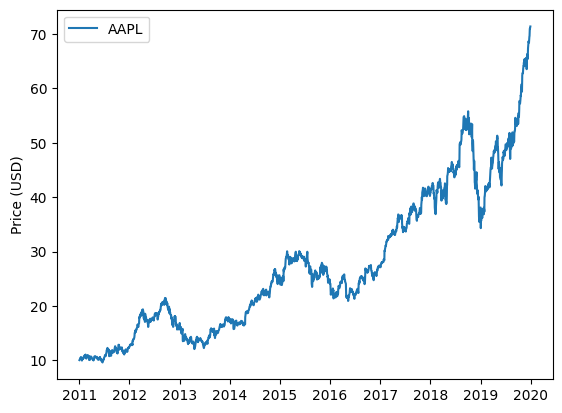

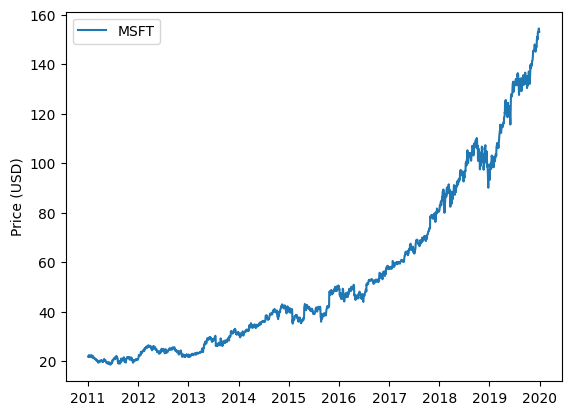

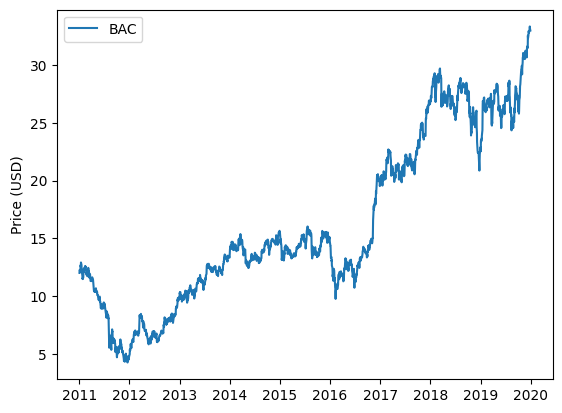

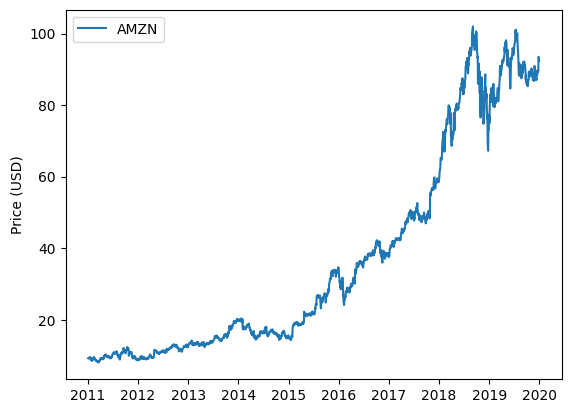

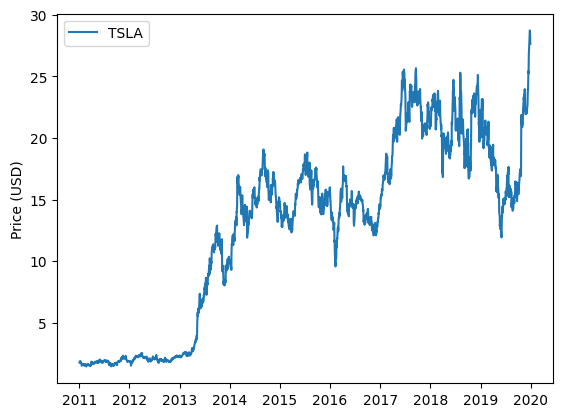

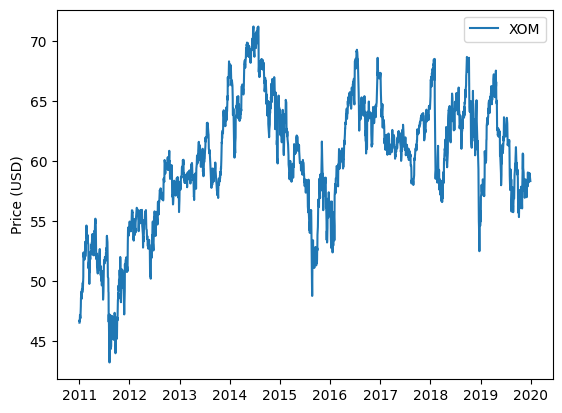

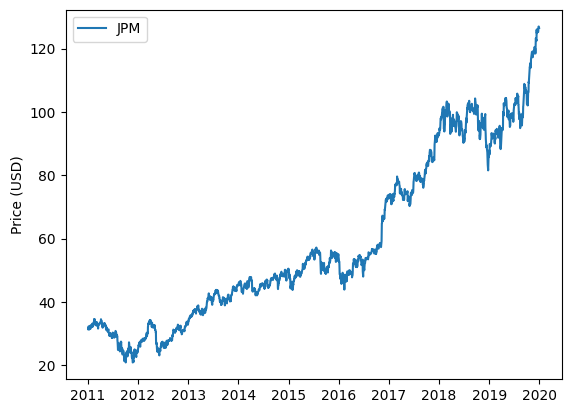

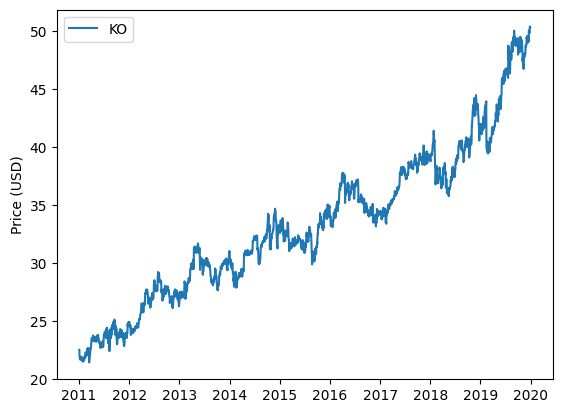

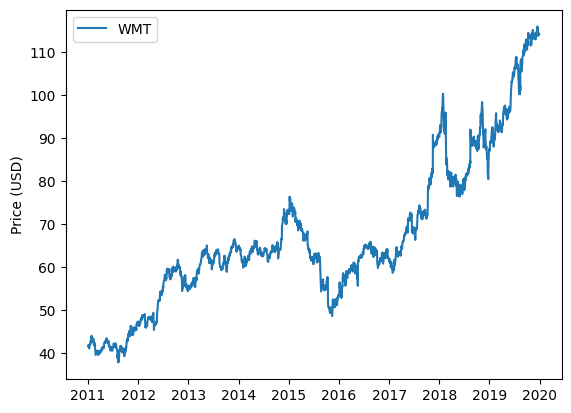

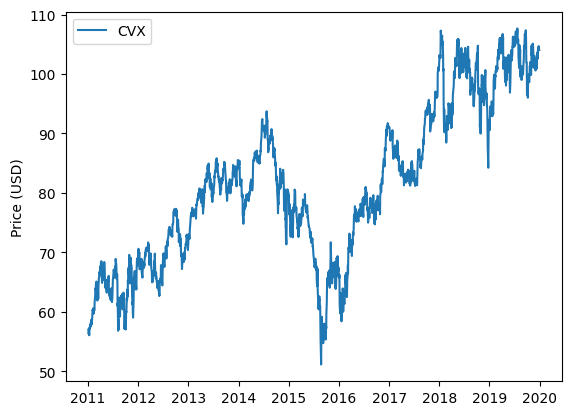

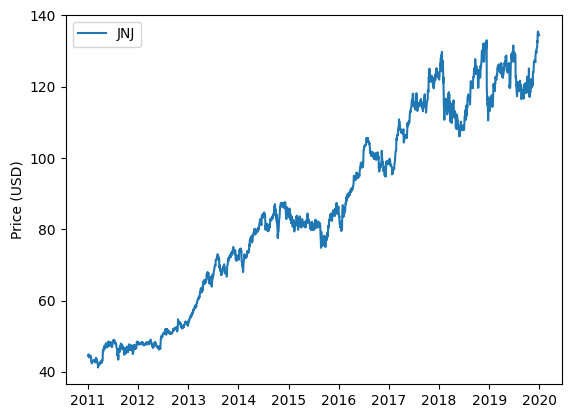

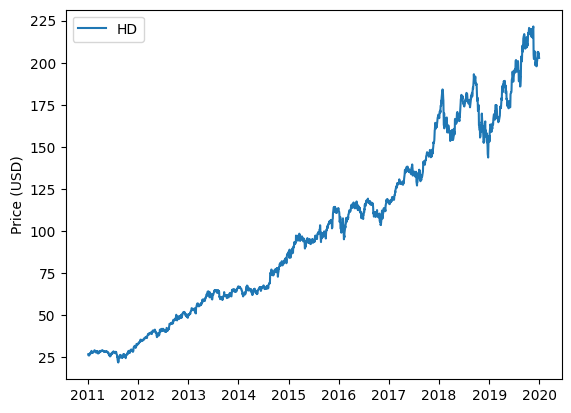

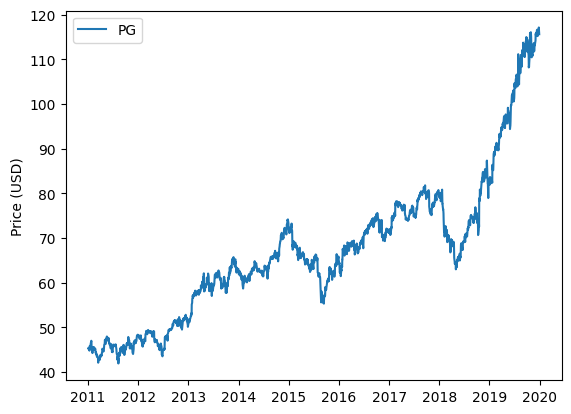

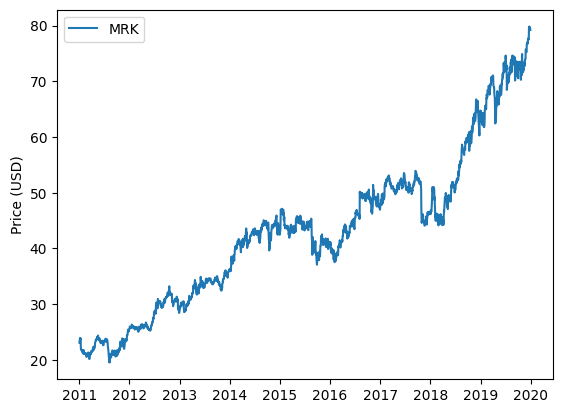

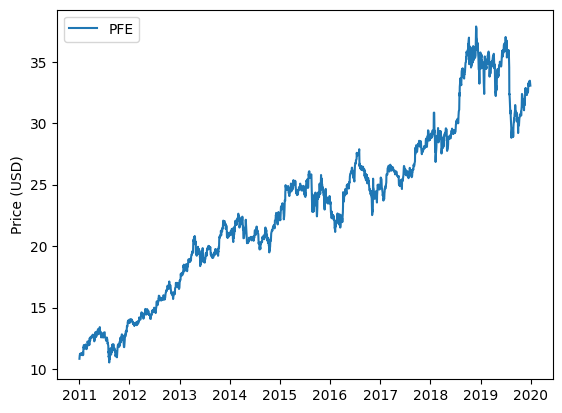

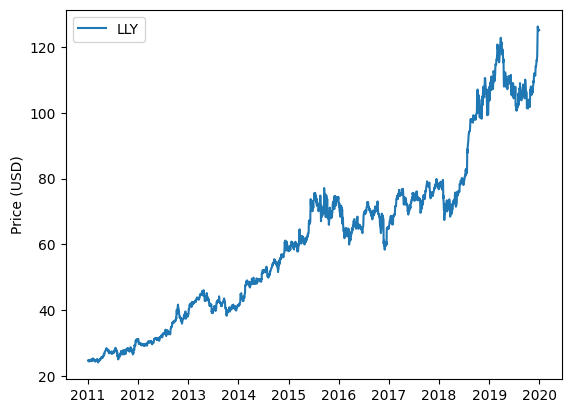

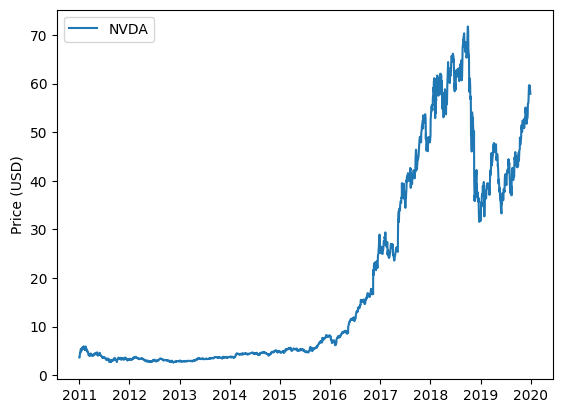

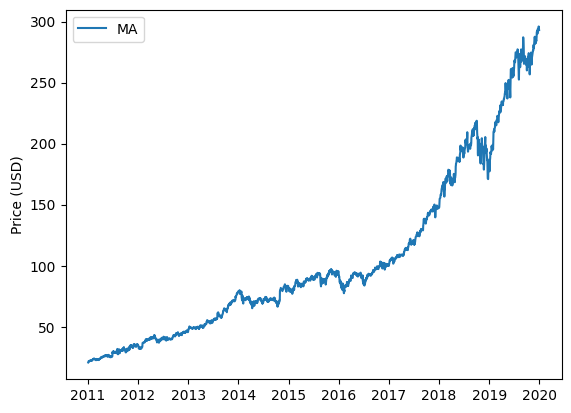

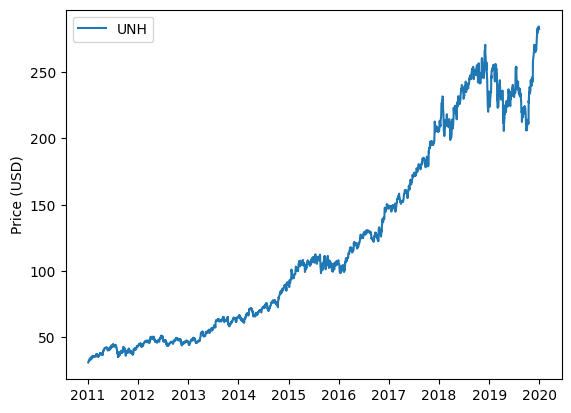

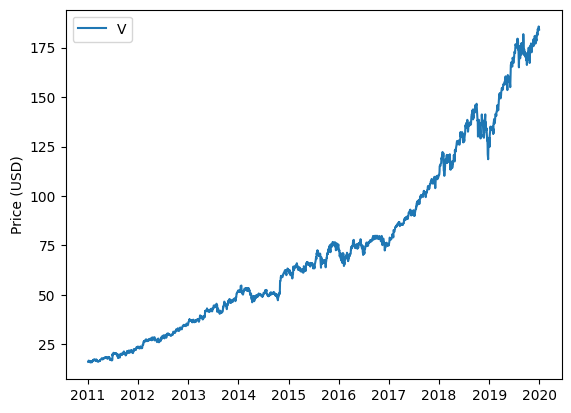

In [ ]:
for stock in dataframe_stock_data_selected_stocks.columns[1:]:
    plot_single_stock(dataframe_stock_data_selected_stocks, str(stock))

In [ ]:
# printing the dataframe without date column

df = dataframe_stock_data_selected_stocks.iloc[:,1:]
df

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
2,10.0332612991333,21.856332778930664,12.012041091918945,9.211000442504883,1.7746670246124268,46.50217056274414,31.384624481201172,22.505250930786133,41.66514587402344,57.01817321777344,44.52234649658203,26.823223114013672,45.26420974731445,23.10027313232422,10.830879211425781,24.827224731445312,3.6297099590301514,20.722257614135742,31.065296173095703,16.184938430786133
3,10.085627555847168,21.9422550201416,12.054369926452637,9.250499725341797,1.777999997138977,46.720497131347656,31.838842391967773,22.039405822753906,41.82551574707031,56.80732345581055,44.897972106933594,26.337039947509766,45.39000701904297,23.298973083496094,11.020782470703125,24.848499298095703,3.6182384490966797,20.989673614501953,31.349763870239258,16.20330047607422
4,10.16812801361084,21.8719539642334,12.274459838867188,9.371000289916992,1.7886669635772705,46.595733642578125,32.22818374633789,21.90827751159668,41.550594329833984,56.70808410644531,44.869625091552734,26.25349235534668,45.28517532348633,23.433578491210938,11.094297409057617,24.67116355895996,3.8958592414855957,21.608001708984375,31.450149536132812,16.545263290405273
5,10.159910202026367,22.512489318847656,12.223673820495605,9.293000221252441,1.858667016029358,46.8951530456543,32.06956100463867,21.749547958374023,41.206966400146484,56.24293899536133,44.79874801635742,26.14712905883789,45.20829772949219,23.75405502319336,11.137179374694824,24.784664154052734,4.435039043426514,21.70001220703125,32.10276412963867,16.793128967285156
6,10.232666969299316,22.340635299682617,12.062838554382324,9.274499893188477,1.8826669454574585,47.15089416503906,31.46392822265625,21.711589813232422,41.29860305786133,56.553035736083984,44.366432189941406,26.11674690246582,45.07553482055664,23.93994140625,11.23519515991211,24.756290435791016,4.558935642242432,21.697195053100586,32.169673919677734,16.744937896728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,69.5571060180664,153.03126525878906,33.03183364868164,89.6500015258789,27.947999954223633,58.981143951416016,125.19734954833984,49.991432189941406,113.88716888427734,104.4437026977539,135.49964904785156,204.62692260742188,116.01876831054688,79.84685516357422,33.406890869140625,124.94463348388672,59.49899673461914,292.51873779296875,283.5381774902344,183.41290283203125
2261,69.62322235107422,153.0020751953125,33.078800201416016,89.46050262451172,28.350000381469727,58.75456237792969,125.54412841796875,49.80934143066406,114.34645080566406,104.45237731933594,135.02774047851562,205.98974609375,116.3160171508789,79.58573913574219,33.38139724731445,124.90650939941406,59.44916915893555,292.7254333496094,283.009765625,183.89334106445312
2262,71.00457000732422,154.2561798095703,33.360565185546875,93.4384994506836,28.729333877563477,58.84687042236328,126.87639617919922,50.091583251953125,114.35600280761719,104.67803955078125,134.93521118164062,206.1298065185547,116.3160171508789,79.49871826171875,33.45787048339844,124.93510437011719,59.5911750793457,294.41790771484375,284.0762939453125,185.45213317871094
2263,70.97764587402344,154.53814697265625,33.200889587402344,93.48999786376953,28.691999435424805,58.64549255371094,126.96766662597656,50.39202117919922,114.42298126220703,104.41765594482422,134.86122131347656,205.3363494873047,117.1241455078125,79.63796997070312,33.406890869140625,125.297119140625,59.01317596435547,295.9332580566406,284.3837890625,185.6776123046875


In [ ]:
#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: 1.640140
p-value: 0.997973
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: 4.091566
p-value: 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: 0.494716
p-value: 0.984712
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: 0.545182
p-value: 0.986184
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion:

In [ ]:
# differencing by taking percentage change in order to make the timeseries stationairy
dataframe_stock_data_selected_stocks_pct_change = pd.DataFrame([])
for stock in dataframe_stock_data_selected_stocks.columns[1:]:
    dataframe_stock_data_selected_stocks_pct_change[stock] = dataframe_stock_data_selected_stocks[stock].astype(float).pct_change()
#         print(value)

In [ ]:
dataframe_stock_data_selected_stocks_pct_change['Date']= dataframe_stock_data_selected_stocks['Date']

In [ ]:
dataframe_stock_data_selected_stocks_pct_change

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,...,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V,Date
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-03
3,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,...,-0.018125,0.002779,0.008602,0.017534,0.000857,-0.003160,0.012905,0.009157,0.001135,2011-01-04
4,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,...,-0.003172,-0.002310,0.005777,0.006671,-0.007137,0.076728,0.029459,0.003202,0.021105,2011-01-05
5,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,...,-0.004051,-0.001698,0.013676,0.003865,0.004601,0.138398,0.004258,0.020751,0.014981,2011-01-06
6,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,...,-0.001162,-0.002937,0.007825,0.008801,-0.001145,0.027936,-0.000130,0.002084,-0.002870,2011-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,...,-0.008952,-0.003670,0.001747,0.002294,-0.009665,-0.002298,-0.004354,0.008544,-0.004894,2019-12-23
2261,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,...,0.006660,0.002562,-0.003270,-0.000763,-0.000305,-0.000837,0.000707,-0.001864,0.002619,2019-12-24
2262,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,...,0.000680,0.000000,-0.001093,0.002291,0.000229,0.002389,0.005782,0.003769,0.008477,2019-12-26
2263,-0.000379,0.001828,-0.004786,0.000551,-0.001300,-0.003422,0.000719,0.005998,0.000586,-0.002487,...,-0.003849,0.006948,0.001752,-0.001524,0.002898,-0.009699,0.005147,0.001082,0.001216,2019-12-27


looking for missing values

In [ ]:

for variable in dataframe_stock_data_selected_stocks_pct_change.columns:
    print(dataframe_stock_data_selected_stocks_pct_change[variable].isnull().sum())

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0


Looks like values are missing from the price columns. this is as expected, because by taking differences we are losing the value of the first timestep

In [ ]:
# skipping the nans in the frist row (as the values there were lost during taking pct change.)
dataframe_stock_data_selected_stocks_pct_change =dataframe_stock_data_selected_stocks_pct_change[1:]

In [ ]:
#skipping date column
dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
3,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,0.008437,-0.018125,0.002779,0.008602,0.017534,0.000857,-0.003160,0.012905,0.009157,0.001135
4,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,-0.000631,-0.003172,-0.002310,0.005777,0.006671,-0.007137,0.076728,0.029459,0.003202,0.021105
5,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,-0.001580,-0.004051,-0.001698,0.013676,0.003865,0.004601,0.138398,0.004258,0.020751,0.014981
6,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,-0.009650,-0.001162,-0.002937,0.007825,0.008801,-0.001145,0.027936,-0.000130,0.002084,-0.002870
7,0.018833,-0.013287,0.010526,-0.004367,0.007436,-0.006086,-0.005500,0.002225,-0.006472,-0.008554,-0.007029,0.000291,-0.002171,-0.004016,-0.004362,-0.011748,0.038248,-0.003851,0.000000,-0.015762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,0.002602,-0.008952,-0.003670,0.001747,0.002294,-0.009665,-0.002298,-0.004354,0.008544,-0.004894
2261,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,-0.003483,0.006660,0.002562,-0.003270,-0.000763,-0.000305,-0.000837,0.000707,-0.001864,0.002619
2262,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,-0.000685,0.000680,0.000000,-0.001093,0.002291,0.000229,0.002389,0.005782,0.003769,0.008477
2263,-0.000379,0.001828,-0.004786,0.000551,-0.001300,-0.003422,0.000719,0.005998,0.000586,-0.002487,-0.000548,-0.003849,0.006948,0.001752,-0.001524,0.002898,-0.009699,0.005147,0.001082,0.001216


# Plotting the stock price timeseries after differencing:

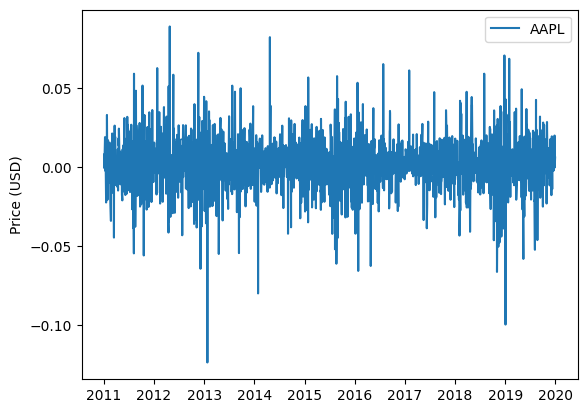

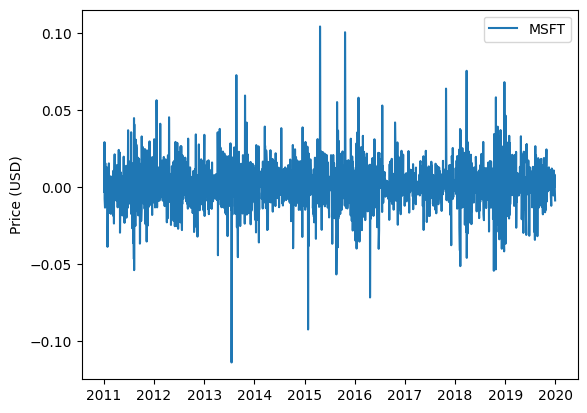

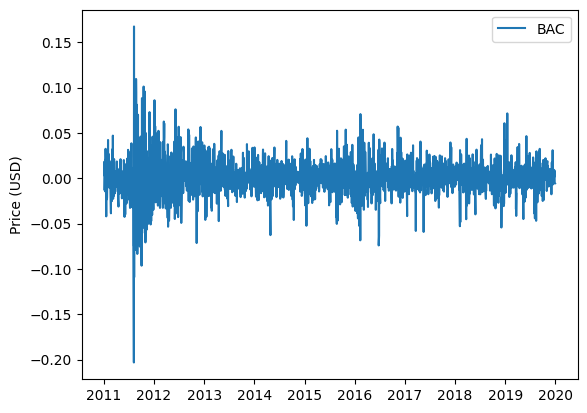

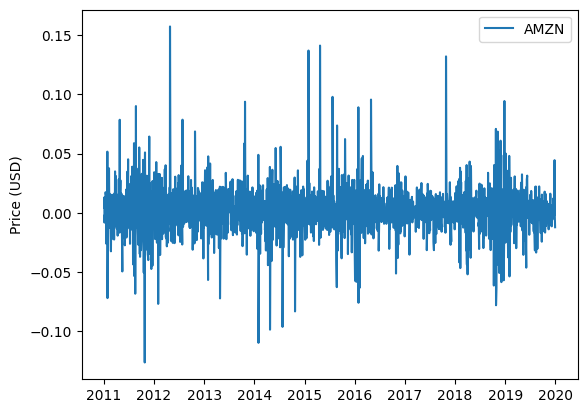

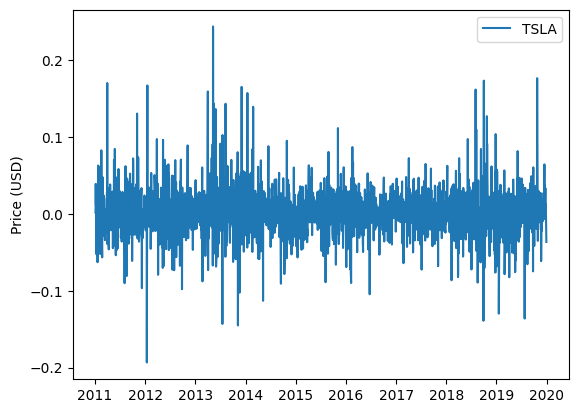

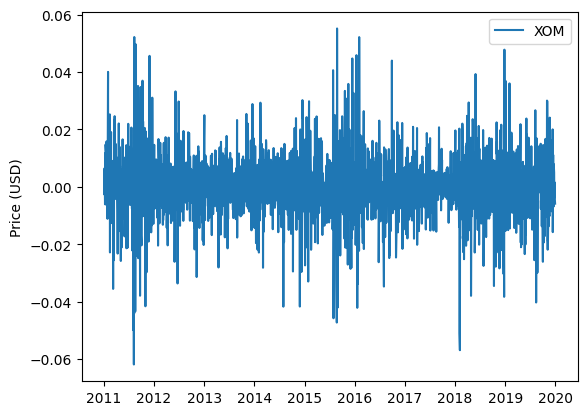

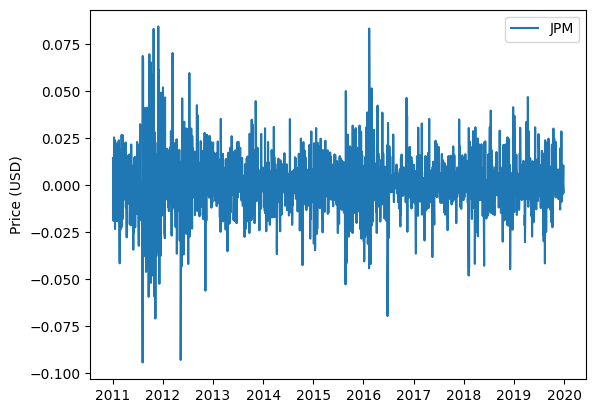

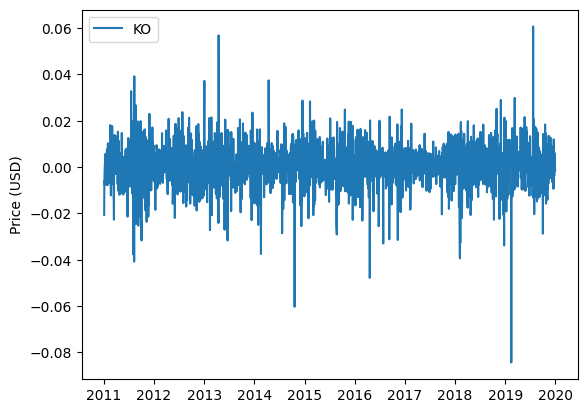

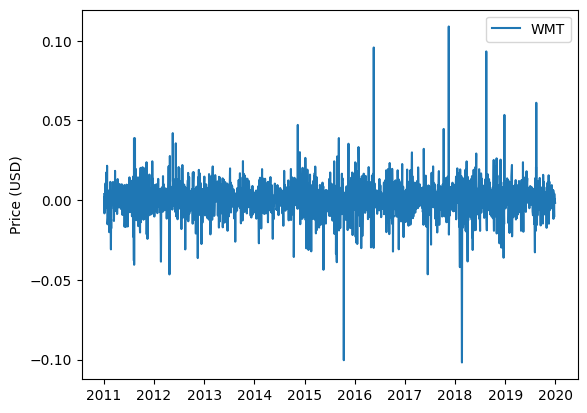

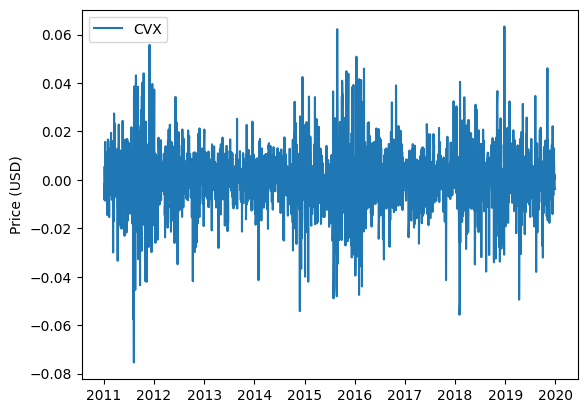

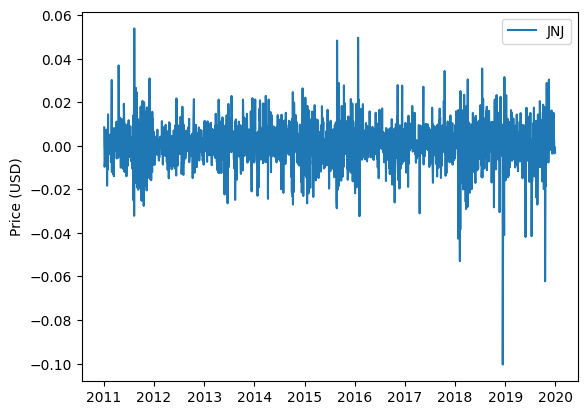

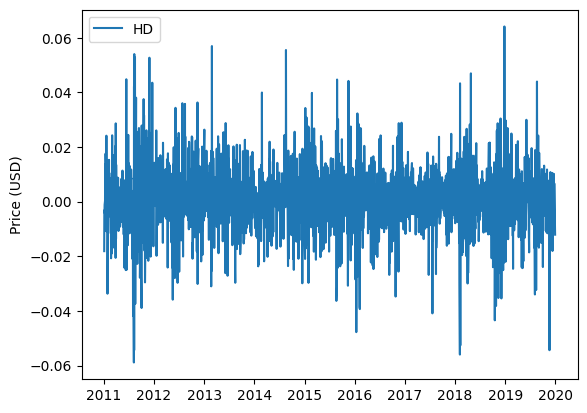

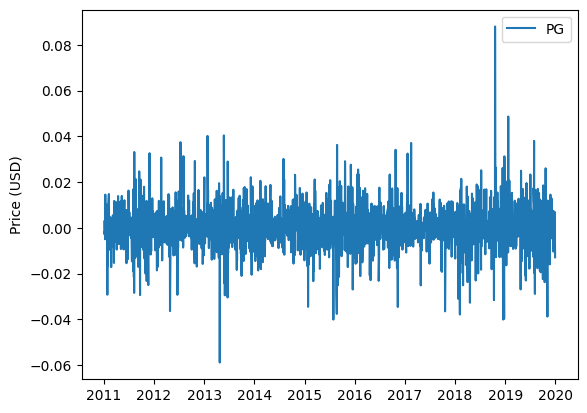

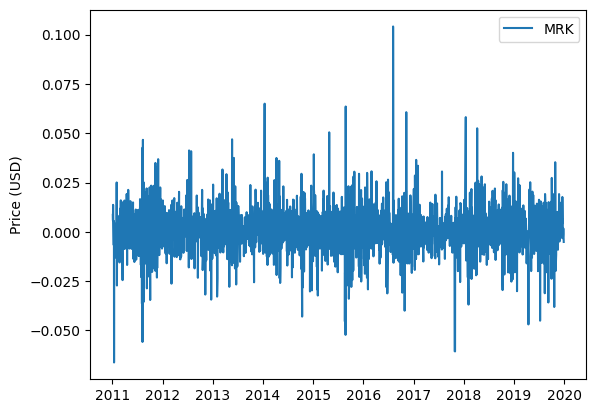

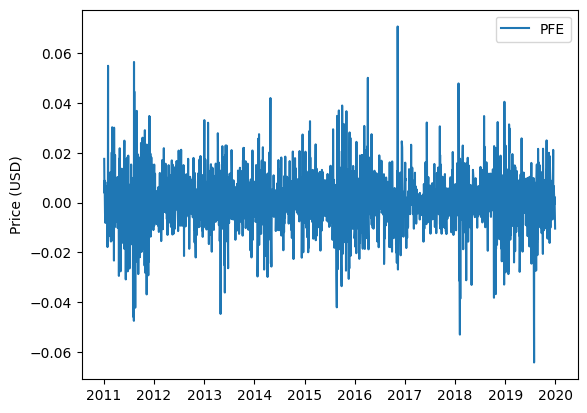

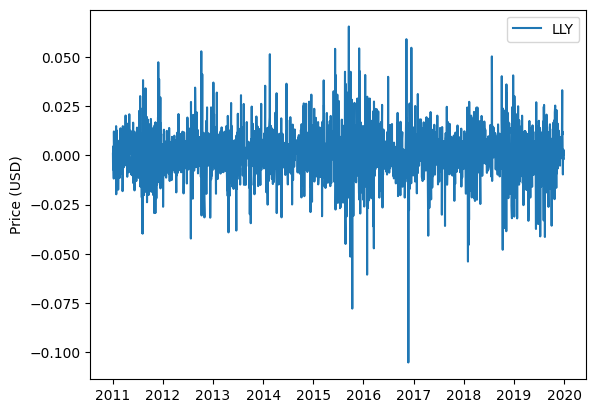

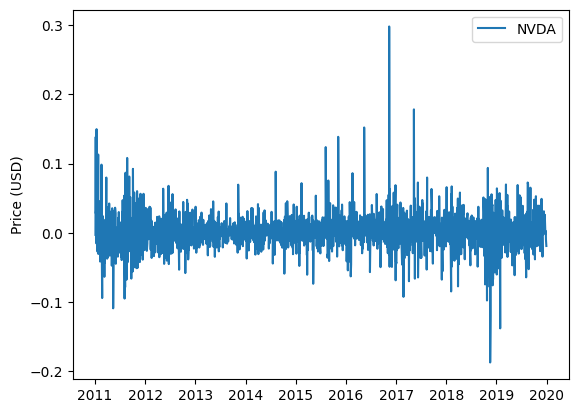

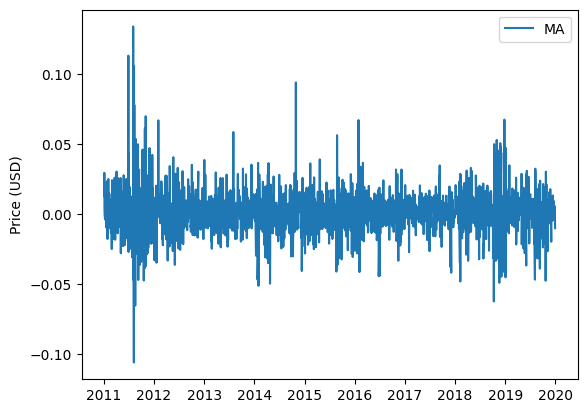

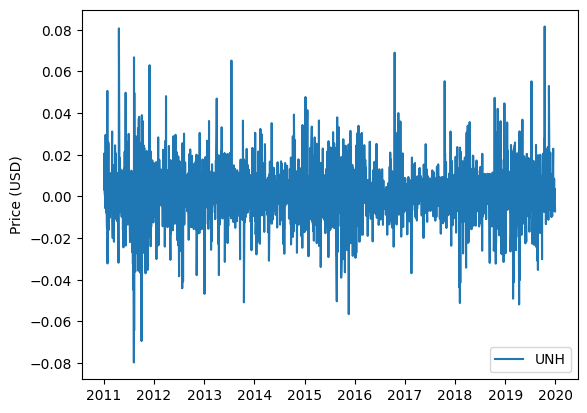

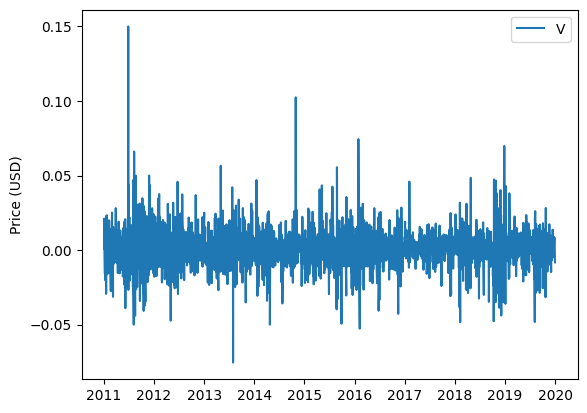

In [ ]:
for stock in dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]:
    plot_single_stock(dataframe_stock_data_selected_stocks_pct_change, str(stock))

Checking for stationarity. Mean looks constant over time, variance does not. Testing for stationarity statistically using the ADF test.

In [ ]:
df = dataframe_stock_data_selected_stocks_pct_change

In [ ]:
#dataframe excluding date column

df = dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-2]

In [ ]:
#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: -14.808812
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: -18.696631
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: -12.724699
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: -34.969185
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclu

# All stocks seem stationairy

In [ ]:
#printing skewness per variable

Skewed_variables = []
Kurtosis_containing_variables = []

for i in df.columns[:-1]:
    print(df[i].describe())
    print(f'Kurtosis: {df[i].kurtosis()}')
    print(f'Skewness: {df[i].skew()}')
    print('\n')
    if df[i].kurtosis() <= -10 or df[i].kurtosis() >= 10:
        Kurtosis_containing_variables.append(i)
    else: 
        continue
    if df[i].skew() >= 3 or df[i].skew() <= -3:
        Skewed_variables.append(i)


if len (Skewed_variables) == 0:
        print(f'All variables have skewness in acceptable ranges (-3 < skewness < 3)\n')
if len (Kurtosis_containing_variables) == 0:
        print(f'All variables have kurtosis in acceptable ranges (-10 < kurtosis < 10)\n')
        print('\n')
elif len (Kurtosis_containing_variables) != 0:
        print(f'Not all variables have kurtosis in acceptable ranges (-10 < kurtosis < 10). The variables which have kurtosis outside this range are: {Kurtosis_containing_variables}\n')
        print('\n')

count    2262.000000
mean        0.000999
std         0.016149
min        -0.123558
25%        -0.006868
50%         0.000887
75%         0.009683
max         0.088742
Name: AAPL, dtype: float64
Kurtosis: 4.713242422683797
Skewness: -0.2286657478994424


count    2262.000000
mean        0.000964
std         0.014369
min        -0.113996
25%        -0.006394
50%         0.000586
75%         0.008221
max         0.104523
Name: MSFT, dtype: float64
Kurtosis: 6.750712021762187
Skewness: 0.07487440766218907


count    2262.000000
mean        0.000650
std         0.020137
min        -0.203182
25%        -0.008724
50%         0.000423
75%         0.010365
max         0.167435
Name: BAC, dtype: float64
Kurtosis: 9.604514010556299
Skewness: -0.11935540758312584


count    2262.000000
mean        0.001207
std         0.019397
min        -0.126568
25%        -0.008078
50%         0.000980
75%         0.011139
max         0.157457
Name: AMZN, dtype: float64
Kurtosis: 8.89733652182917
Skewness: 0.4

Some variables have  high kurtosis, namely: 'WMT' & 'NVDA'

# Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF)

ACF $\rightarrow$ taking in account all combinations for the Pearson correlation. Model example for correlation between now and two time units ago:

$$ \textrm{CORR}(s_{t-2}, s_t) $$

PACF $\rightarrow$ only taking in account the direct effect in the correlation and using linear regression with model:

$$ s_t = \beta_0 + \beta_1 s_{t-1} + \beta_2 s_{t-2} + \beta_3 s_{t-3} ... + \epsilon_t,$$

where $\beta_i$ gives us the direct effect of $s_{t-i}$ on $s_t$.


AAPL


C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


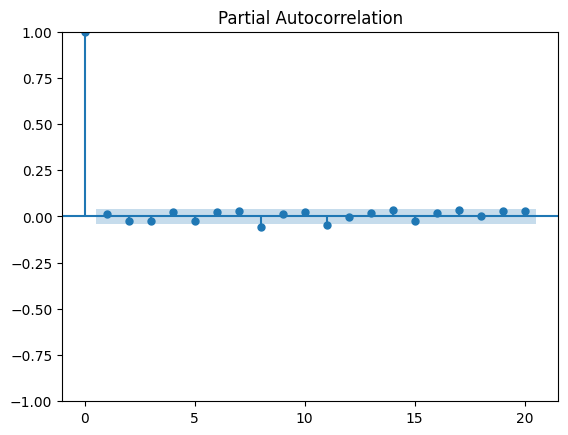

MSFT


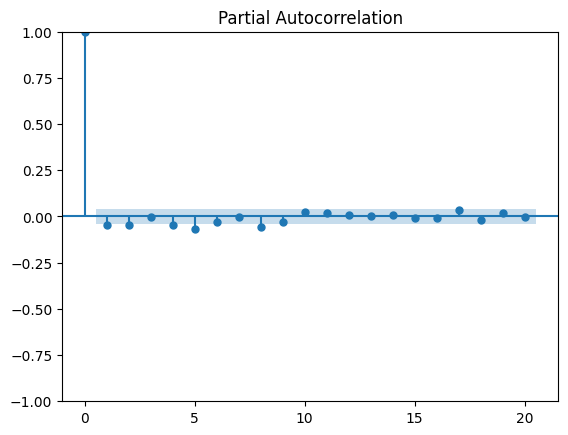

BAC


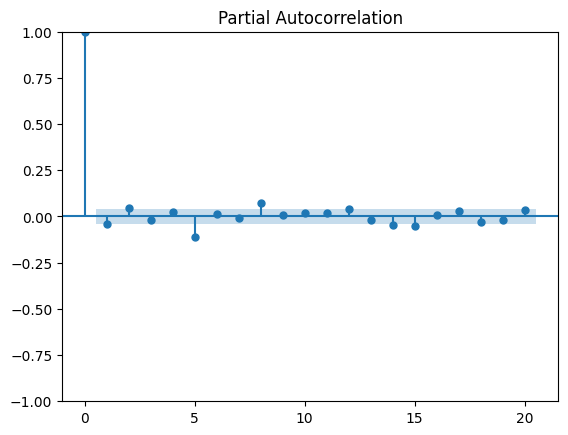

AMZN


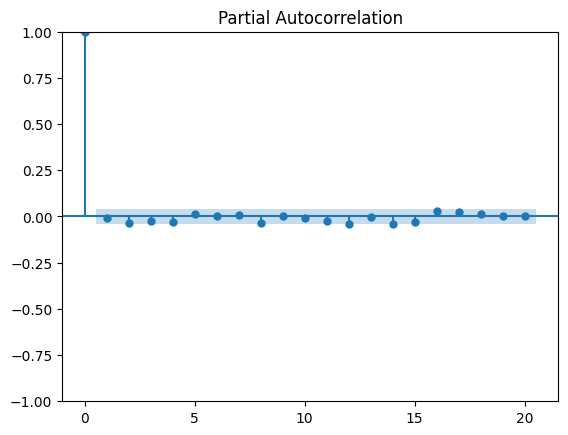

TSLA


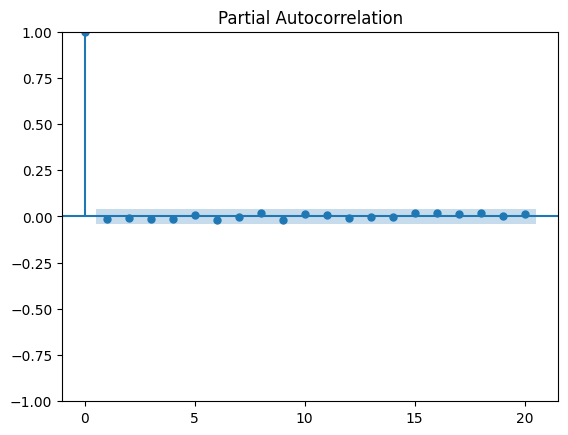

XOM


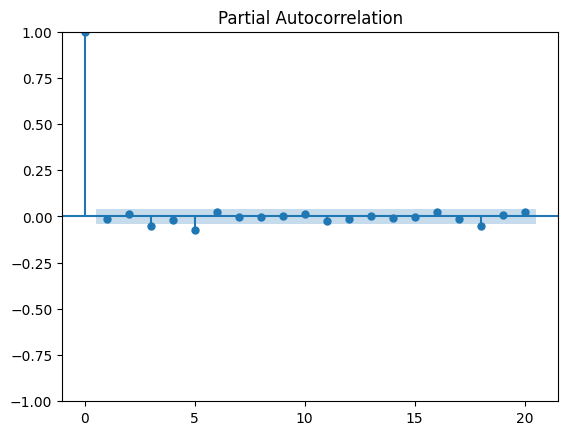

JPM


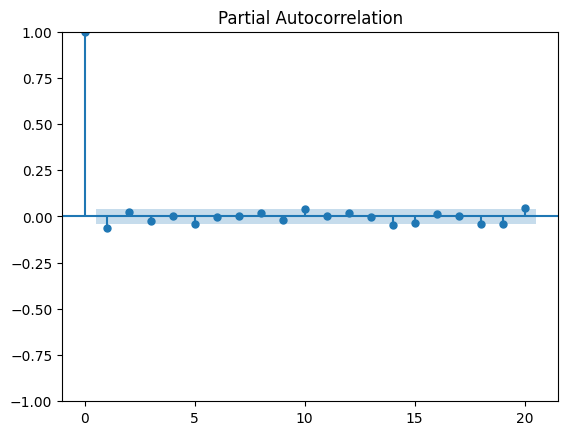

KO


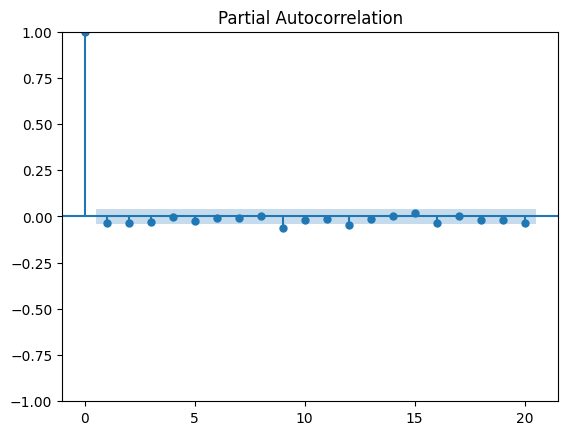

WMT


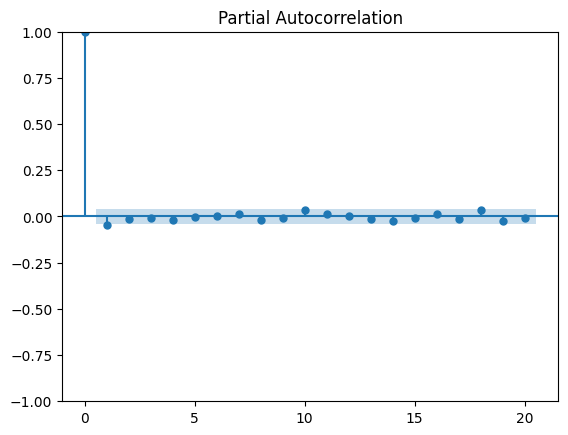

CVX


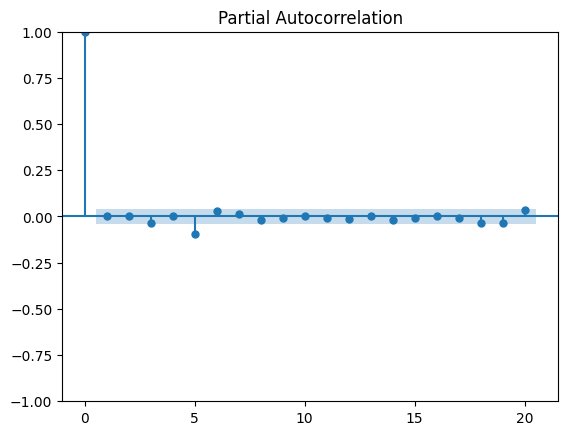

JNJ


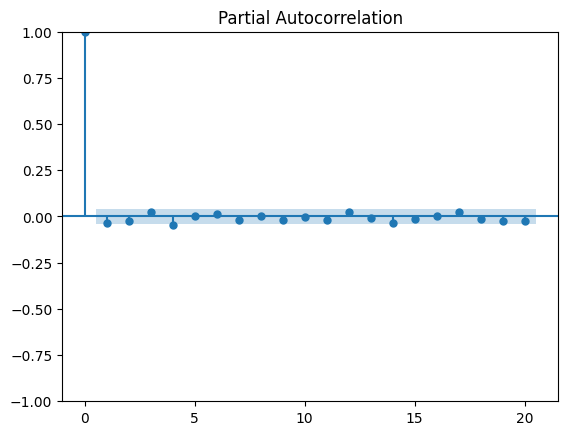

HD


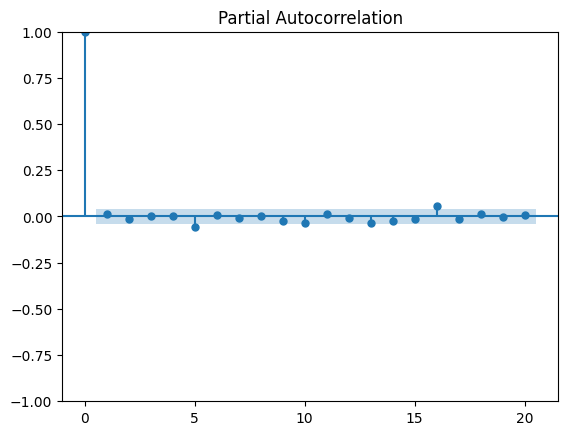

PG


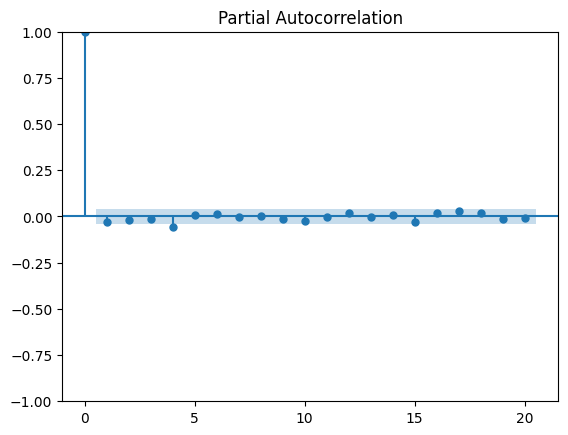

MRK


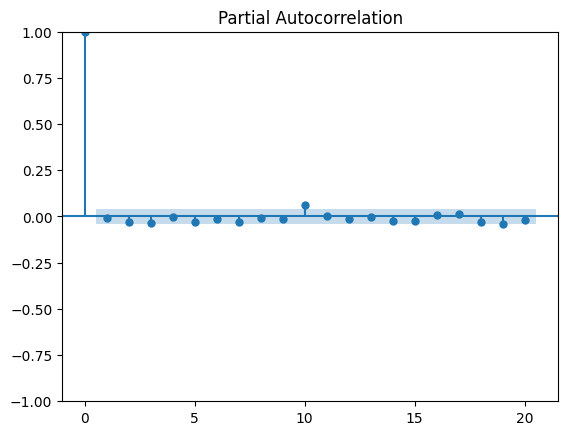

PFE


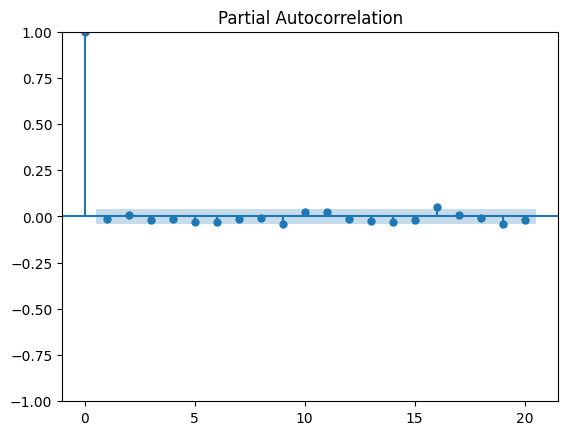

LLY


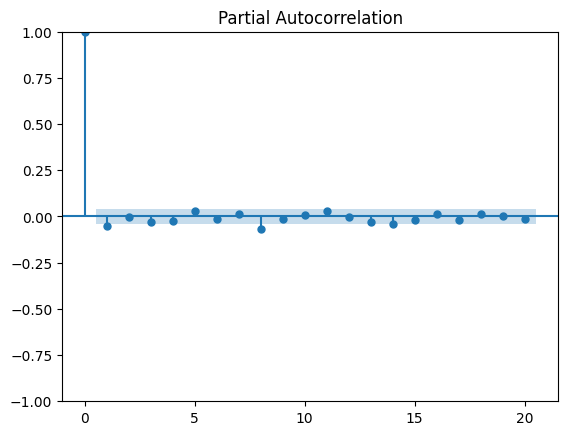

NVDA


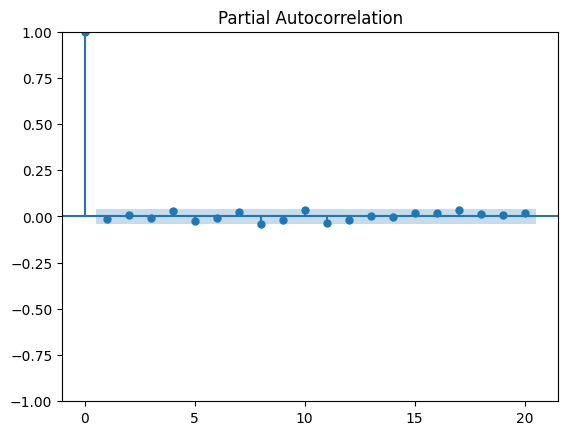

MA


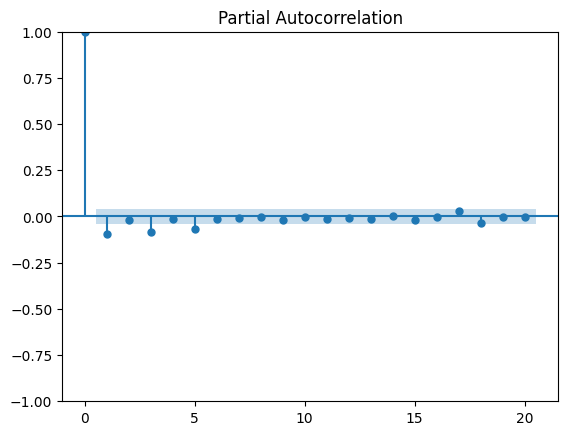

In [ ]:
#testing partial auto correlations
for variable in df.columns[:-1]:
    plot_pacf(df[variable], lags = 20)
    print(variable)
    plt.show()

AAPL


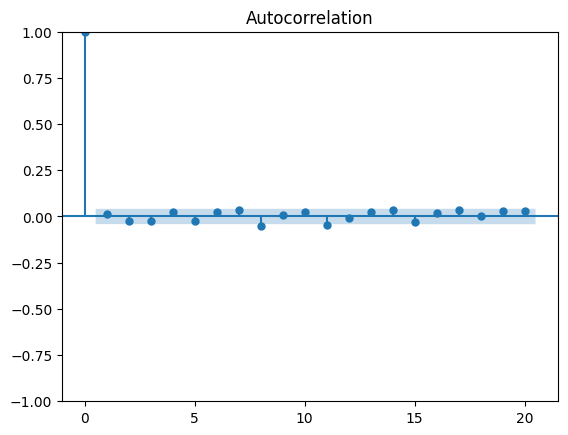

MSFT


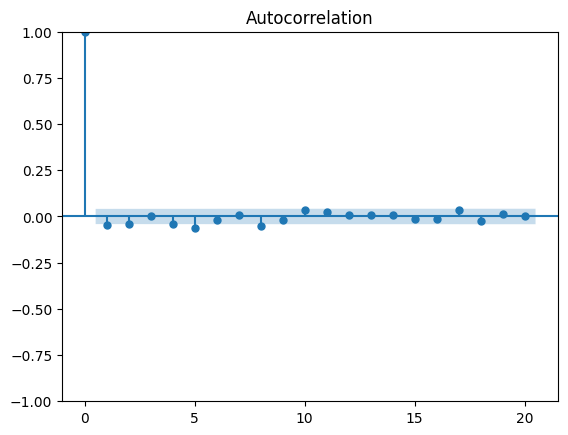

BAC


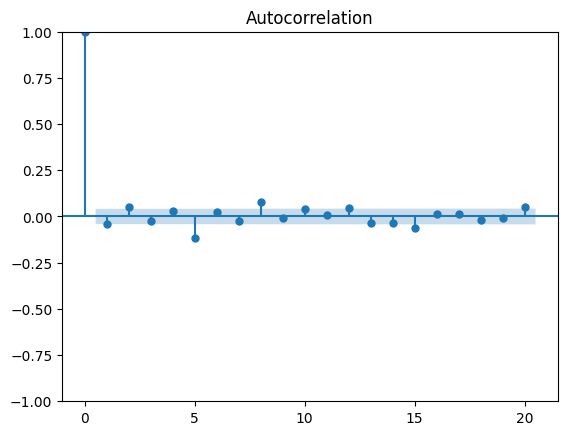

AMZN


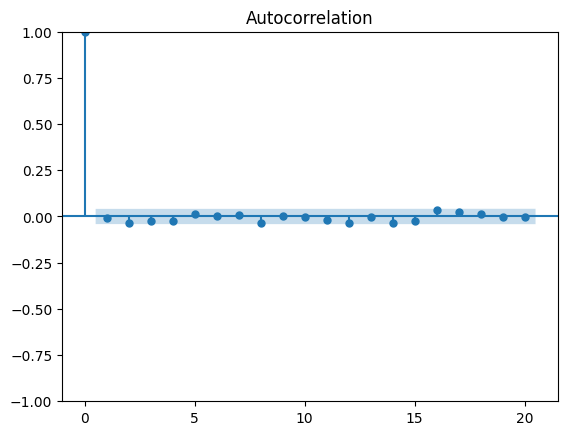

TSLA


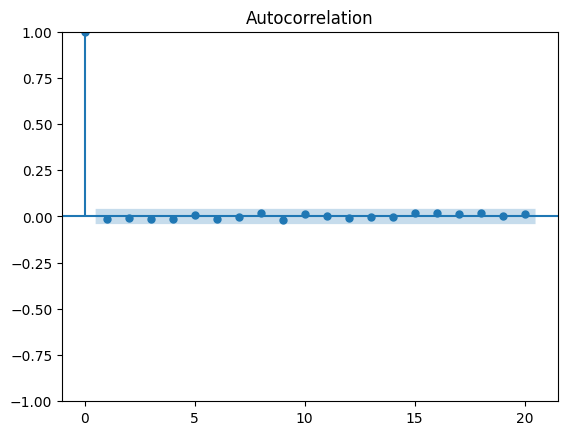

XOM


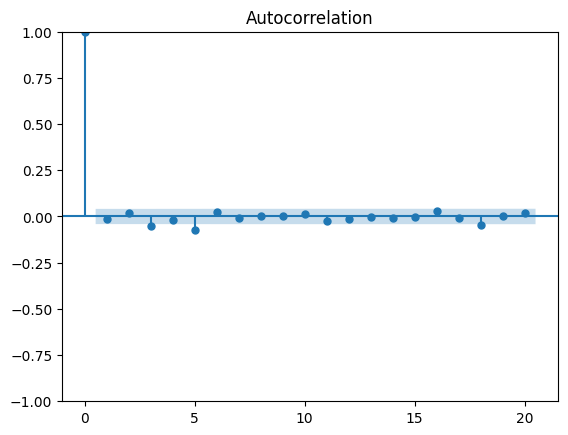

JPM


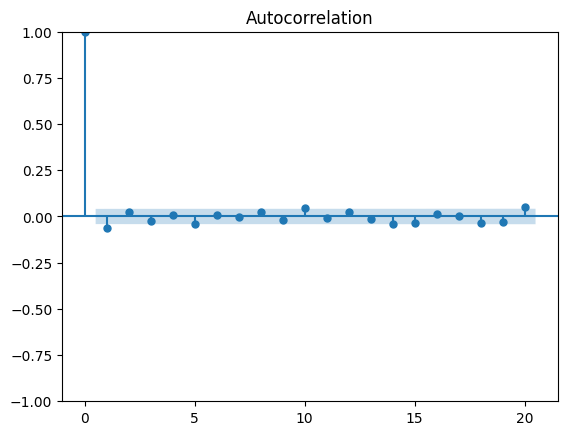

KO


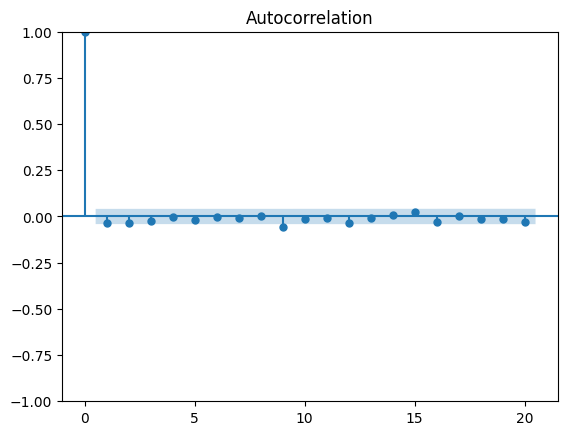

WMT


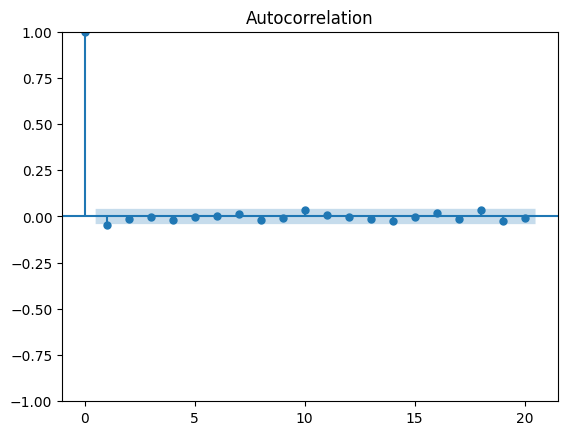

CVX


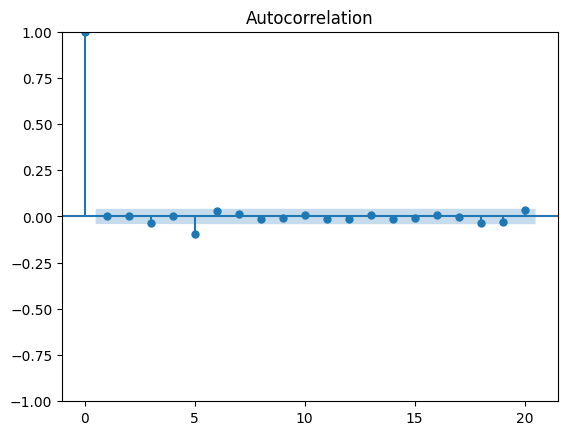

JNJ


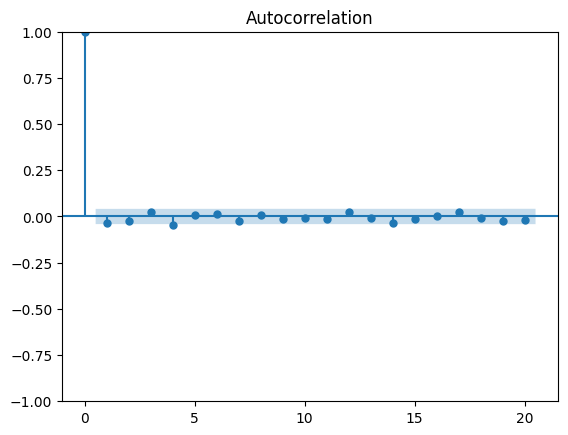

HD


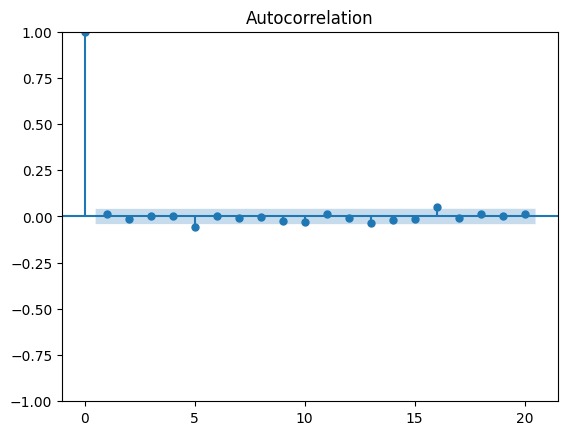

PG


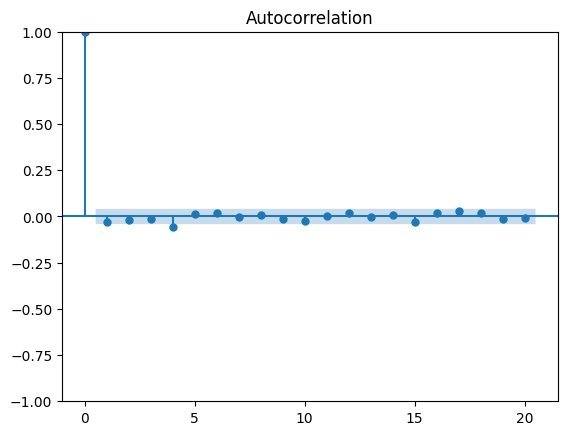

MRK


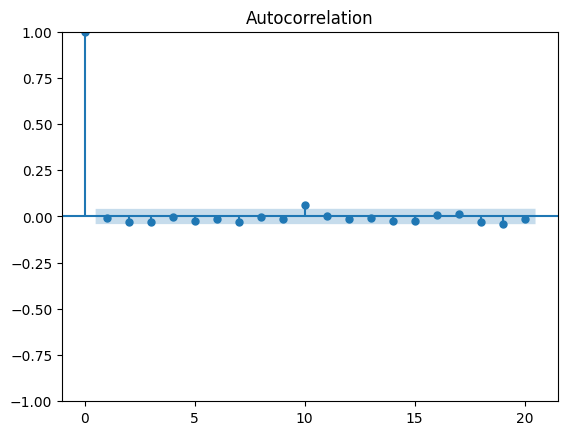

PFE


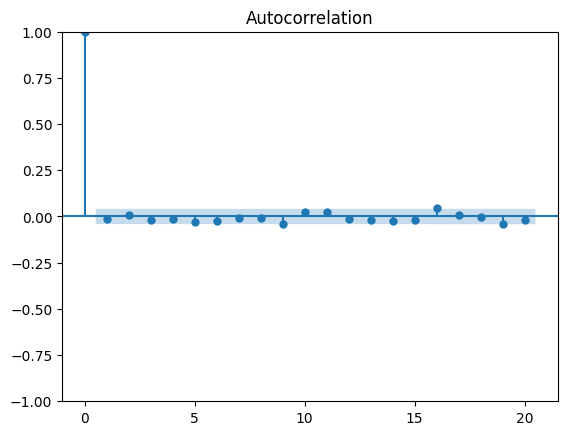

LLY


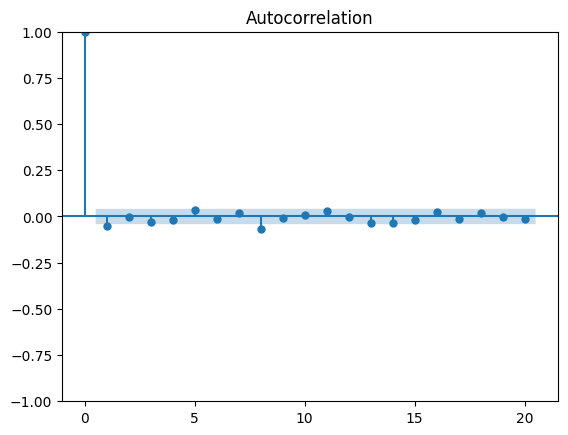

NVDA


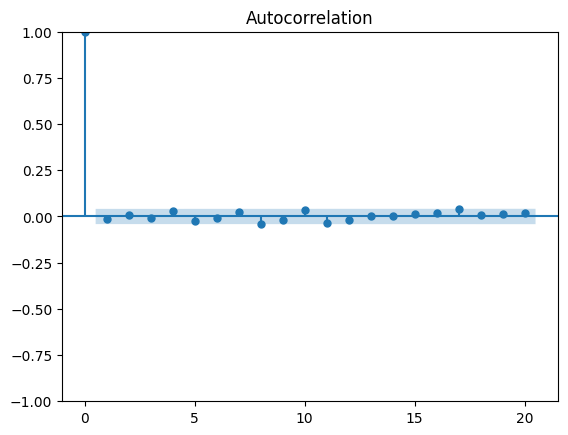

MA


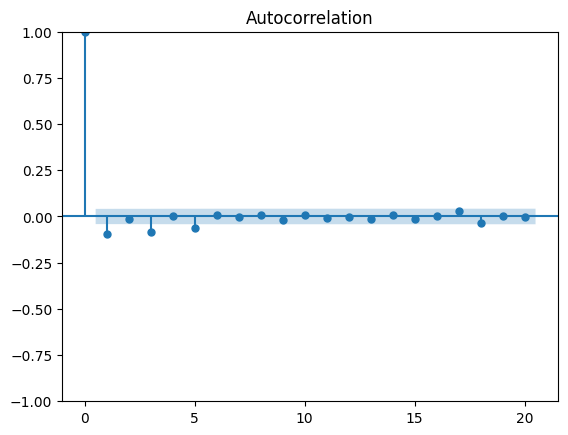

In [ ]:
for variable in df.columns[:-1]:
    plot_acf(df[variable], lags = 20)
    print(variable)
    plt.show()

We can see from the auto and partial auto correlation plots that values of timestep t are not significantly correlated with values of previous timesteps in most cases, however some lags with significant valeus can be seen (the ones which are outside the blue bar around y = 0) To select optimal lag lenght, we will later use the AIC information criterion to find get the best model fit with the minumum model complexity.

In [ ]:
dataframe_stock_data_selected_stocks_pct_change.to_csv('stock_data_daily_pct_change.csv')

# Testing for strong stationarity

Strong stationarity means that the distribution of values for each window of time is the same accross the timeseries. To test this, we can use a komlogrov smirnov test on each window, sliding the window across the timeseries

In [ ]:
df

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH
3,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,0.008437,-0.018125,0.002779,0.008602,0.017534,0.000857,-0.003160,0.012905,0.009157
4,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,-0.000631,-0.003172,-0.002310,0.005777,0.006671,-0.007137,0.076728,0.029459,0.003202
5,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,-0.001580,-0.004051,-0.001698,0.013676,0.003865,0.004601,0.138398,0.004258,0.020751
6,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,-0.009650,-0.001162,-0.002937,0.007825,0.008801,-0.001145,0.027936,-0.000130,0.002084
7,0.018833,-0.013287,0.010526,-0.004367,0.007436,-0.006086,-0.005500,0.002225,-0.006472,-0.008554,-0.007029,0.000291,-0.002171,-0.004016,-0.004362,-0.011748,0.038248,-0.003851,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,0.002602,-0.008952,-0.003670,0.001747,0.002294,-0.009665,-0.002298,-0.004354,0.008544
2261,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,-0.003483,0.006660,0.002562,-0.003270,-0.000763,-0.000305,-0.000837,0.000707,-0.001864
2262,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,-0.000685,0.000680,0.000000,-0.001093,0.002291,0.000229,0.002389,0.005782,0.003769
2263,-0.000379,0.001828,-0.004786,0.000551,-0.001300,-0.003422,0.000719,0.005998,0.000586,-0.002487,-0.000548,-0.003849,0.006948,0.001752,-0.001524,0.002898,-0.009699,0.005147,0.001082


In [ ]:
# Create sliding windows of timeseries

# create sliding windows of timeseries per stock:
list_of_windows_per_stock = []
for stock in df.columns:
  stock_timeseries = df[str(stock)]
  # Define the window size
  window_size = 78

  # Initialize the list of windows
  windows = []

  # Iterate over the time series
  for i in np.arange(len(stock_timeseries.index) - window_size + 1, step = window_size):
    # Take the last `window_size` elements of the time series
    # windows are non overlapping, i.e. the first window is from index 0-20, the next from 20-40 etc. 
    # instead of first window being index 0-20, second window being 1-21, etc.
    current_window = stock_timeseries[i:i+window_size]

    # Add the current window to the list of windows
    windows.append(np.array(current_window))
  list_of_windows_per_stock.append(windows)
    


C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_17372\3811222403.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  current_window = stock_timeseries[i:i+window_size]


In [ ]:
array_list_of_windows_per_stock = np.array(list_of_windows_per_stock)

In [ ]:
# so, we have an array of lists of arrays.
# axis 0 contains all stocks
# axis 1 contains the windows per stock
# axis 2 contains the values per window

array_list_of_windows_per_stock.shape


(19, 29, 78)

In [ ]:
ks_test_results_per_window_per_stock = []
for stock in range(len(df.columns)):
    ks_test_results_per_window = []
    windows = array_list_of_windows_per_stock[stock]
    for i in range(len(windows)-1):
        # do a ks test on each pair of subsequent windows and append the result to a list containing the ks test results per window
        results_kolmogrov_smirnow = kstest(windows[i],windows[i+1])
        ks_test_results_per_window.append(results_kolmogrov_smirnow)
    # append the ks test results per window, containting all the window results of 1, to a list containing the kstest results of other stocks
    ks_test_results_per_window_per_stock.append(ks_test_results_per_window)

In [ ]:
# we can see a dataframe containing the df test tuples of (test_statstic, p-value)
# H0 is that the distributions of two windows are the same which is, using alpha < 0.05 and a two sided test, rejected if p < 0.05


ks_test_pd = pd.DataFrame(ks_test_results_per_window_per_stock, index = df.columns)

In [ ]:
ks_test_pd

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
AAPL,"(0.07692307692307693, 0.9765886559700784)","(0.08974358974358974, 0.9146976761817383)","(0.2692307692307692, 0.006781160583943081)","(0.2692307692307692, 0.006781160583943081)","(0.10256410256410256, 0.8099828657091238)","(0.14102564102564102, 0.4221353780108159)","(0.11538461538461539, 0.6801596116769174)","(0.1794871794871795, 0.1624324239257221)","(0.14102564102564102, 0.4221353780108159)","(0.14102564102564102, 0.4221353780108159)",...,"(0.16666666666666666, 0.22969973295499502)","(0.23076923076923078, 0.03108170124764398)","(0.14102564102564102, 0.4221353780108159)","(0.1282051282051282, 0.5459989251653901)","(0.1282051282051282, 0.5459989251653901)","(0.10256410256410256, 0.8099828657091238)","(0.28205128205128205, 0.0038652615827988413)","(0.2564102564102564, 0.011574738746542348)","(0.14102564102564102, 0.4221353780108159)","(0.16666666666666666, 0.22969973295499502)"
MSFT,"(0.1282051282051282, 0.5459989251653901)","(0.14102564102564102, 0.4221353780108159)","(0.23076923076923078, 0.03108170124764398)","(0.1794871794871795, 0.1624324239257221)","(0.10256410256410256, 0.8099828657091238)","(0.10256410256410256, 0.8099828657091238)","(0.1282051282051282, 0.5459989251653901)","(0.08974358974358974, 0.9146976761817383)","(0.1282051282051282, 0.5459989251653901)","(0.1282051282051282, 0.5459989251653901)",...,"(0.10256410256410256, 0.8099828657091238)","(0.14102564102564102, 0.4221353780108159)","(0.07692307692307693, 0.9765886559700784)","(0.14102564102564102, 0.4221353780108159)","(0.11538461538461539, 0.6801596116769174)","(0.10256410256410256, 0.8099828657091238)","(0.20512820512820512, 0.0749483529513129)","(0.20512820512820512, 0.0749483529513129)","(0.08974358974358974, 0.9146976761817383)","(0.11538461538461539, 0.6801596116769174)"
BAC,"(0.1282051282051282, 0.5459989251653901)","(0.21794871794871795, 0.04891508856021219)","(0.24358974358974358, 0.01922582971456673)","(0.23076923076923078, 0.03108170124764398)","(0.3333333333333333, 0.00030875011471562133)","(0.08974358974358974, 0.9146976761817383)","(0.15384615384615385, 0.31597737446824326)","(0.08974358974358974, 0.9146976761817383)","(0.10256410256410256, 0.8099828657091238)","(0.1282051282051282, 0.5459989251653901)",...,"(0.14102564102564102, 0.4221353780108159)","(0.14102564102564102, 0.4221353780108159)","(0.10256410256410256, 0.8099828657091238)","(0.11538461538461539, 0.6801596116769174)","(0.14102564102564102, 0.4221353780108159)","(0.1282051282051282, 0.5459989251653901)","(0.19230769230769232, 0.11181648288602895)","(0.16666666666666666, 0.22969973295499502)","(0.14102564102564102, 0.4221353780108159)","(0.20512820512820512, 0.0749483529513129)"
AMZN,"(0.11538461538461539, 0.6801596116769174)","(0.16666666666666666, 0.22969973295499502)","(0.15384615384615385, 0.31597737446824326)","(0.10256410256410256, 0.8099828657091238)","(0.1282051282051282, 0.5459989251653901)","(0.21794871794871795, 0.04891508856021219)","(0.10256410256410256, 0.8099828657091238)","(0.14102564102564102, 0.4221353780108159)","(0.1282051282051282, 0.5459989251653901)","(0.10256410256410256, 0.8099828657091238)",...,"(0.08974358974358974, 0.9146976761817383)","(0.11538461538461539, 0.6801596116769174)","(0.11538461538461539, 0.6801596116769174)","(0.20512820512820512, 0.0749483529513129)","(0.10256410256410256, 0.8099828657091238)","(0.07692307692307693, 0.9765886559700784)","(0.23076923076923078, 0.03108170124764398)","(0.21794871794871795, 0.04891508856021219)","(0.10256410256410256, 0.8099828657091238)","(0.11538461538461539, 0.6801596116769174)"
TSLA,"(0.11538461538461539, 0.6801596116769174)","(0.1282051282051282, 0.5459989251653901)","(0.1794871794871795, 0.1624324239257221)","(0.1794871794871795, 0.1624324239257221)","(0.11538461538461539, 0.6801596116769174)","(0.19230769230769232, 0.11181648288602895)","(0.19230769230769232, 0.11181648288602895)","(0.08974358974358974, 0.9146976761817383)","(0.16666666666666666, 

In [ ]:
ks_test_results_per_window_per_stock_p_values = []
for stock in range(len(df.columns)):
    ks_test_results_per_window = []
    windows = array_list_of_windows_per_stock[stock]
    for i in range(len(windows)-1):
        # do a ks test on each pair of subsequent windows and append the result to a list containing the ks test results per window
        results_kolmogrov_smirnow = kstest(windows[i],windows[i+1])[1]
        ks_test_results_per_window.append(results_kolmogrov_smirnow)
    # append the ks test results per window, containting all the window results of 1 stock, to a list containing the kstest results of other stocks
    ks_test_results_per_window_per_stock_p_values.append(ks_test_results_per_window)

In [ ]:
df_ks_test_p_values = pd.DataFrame(np.array(ks_test_results_per_window_per_stock_p_values), index = ks_test_pd.index)
df_ks_test_p_values

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
AAPL,0.976589,0.914698,0.006781,0.006781,0.809983,0.422135,0.680160,0.162432,0.422135,0.422135,...,0.229700,0.031082,0.422135,0.545999,0.545999,0.809983,0.003865,0.011575,0.422135,0.229700
MSFT,0.545999,0.422135,0.031082,0.162432,0.809983,0.809983,0.545999,0.914698,0.545999,0.545999,...,0.809983,0.422135,0.976589,0.422135,0.680160,0.809983,0.074948,0.074948,0.914698,0.680160
BAC,0.545999,0.048915,0.019226,0.031082,0.000309,0.914698,0.315977,0.914698,0.809983,0.545999,...,0.422135,0.422135,0.809983,0.680160,0.422135,0.545999,0.111816,0.229700,0.422135,0.074948
AMZN,0.680160,0.229700,0.315977,0.809983,0.545999,0.048915,0.809983,0.422135,0.545999,0.809983,...,0.914698,0.680160,0.680160,0.074948,0.809983,0.976589,0.031082,0.048915,0.809983,0.680160
TSLA,0.680160,0.545999,0.162432,0.162432,0.680160,0.111816,0.111816,0.914698,0.229700,0.809983,...,0.019226,0.315977,0.315977,0.976589,0.315977,0.315977,0.315977,0.545999,0.315977,0.315977
XOM,0.111816,0.111816,0.111816,0.809983,0.422135,0.914698,0.976589,0.422135,0.545999,0.422135,...,0.976589,0.914698,0.162432,0.229700,0.031082,0.545999,0.111816,0.111816,0.680160,0.809983
JPM,0.315977,0.019226,0.002143,0.019226,0.003865,0.914698,0.315977,0.162432,0.976589,0.976589,...,0.680160,0.111816,0.976589,0.914698,0.229700,0.315977,0.229700,0.074948,0.422135,0.111816
KO,0.914698,0.229700,0.048915,0.315977,0.680160,0.111816,0.809983,0.422135,0.545999,0.680160,...,0.680160,0.809983,0.680160,0.111816,0.809983,0.545999,0.229700,0.422135,0.422135,0.680160
WMT,0.914698,0.162432,0.074948,0.315977,0.422135,0.809983,0.914698,0.111816,0.914698,0.422135,...,0.914698,0.162432,0.680160,0.315977,0.229700,0.031082,0.111816,0.809983,0.914698,0.162432
CVX,0.162432,0.315977,0.074948,0.976589,0.545999,0.545999,0.680160,0.162432,0.680160,0.422135,...,0.680160,0.976589,0.074948,0.315977,0.422135,0.422135,0.422135,0.162432,0.545999,0.422135


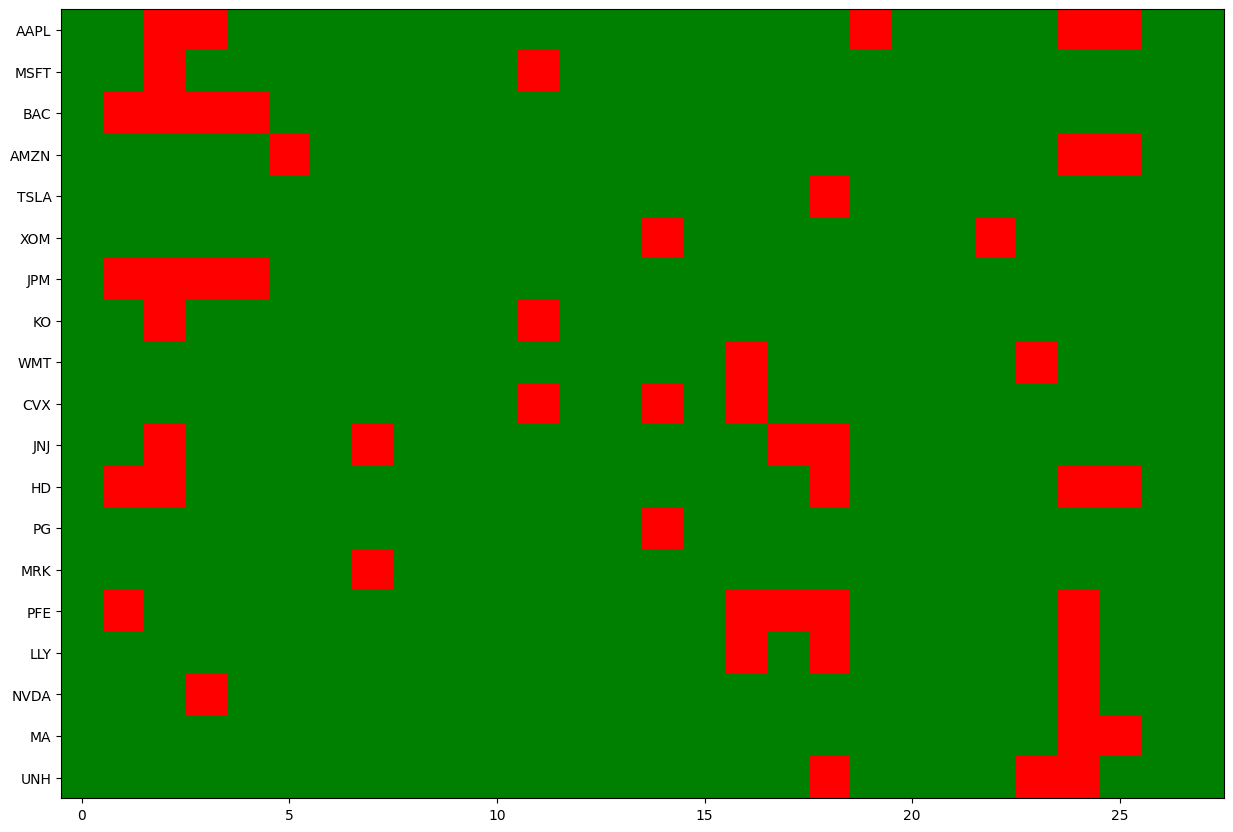

In [ ]:
#creating the colormap

import matplotlib as mpl

cmap = (mpl.colors.ListedColormap(['red', 'green']))

bounds = [0,0.05]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# creating the heatmap

#labels for the y axis
x_label_list = df_ks_test_p_values.index

fig, ax = plt.subplots(1,1)

labels = df_ks_test_p_values.index.to_list()

img = ax.imshow(df_ks_test_p_values, cmap=cmap, norm=norm)

y_label_list = labels

ax.set_yticks(range(19))

ax.set_yticklabels(x_label_list)

fig.set_size_inches(15,15)




In [ ]:
# creating bolean mask to put on dataframe later, in order to only print occurences where p < 0.05
bolean_p_value_mask = []
for ks_tuple in ks_test_pd.iloc[1,:]:
    if ks_tuple[1] < 0.05:
        bolean_p_value_mask.append(True)
    else:
        bolean_p_value_mask.append(False)

In [ ]:
bolean_p_value_mask.count(True)


2

In [ ]:
#using the same code to print these occurences
non_stationairy_window_count = {}

for variable in range(len(ks_test_pd.index)):
    bolean_p_value_mask = []
    for ks_tuple in ks_test_pd.iloc[variable,:]:
        if ks_tuple[1] < 0.05:
            bolean_p_value_mask.append(True)
        else:
            bolean_p_value_mask.append(False)
    non_stationairy_window_count[(ks_test_pd.index.tolist()[variable])] = bolean_p_value_mask.count(True)
    print(f'windows in variable {ks_test_pd.index.tolist()[variable]} where p < 0.05 and timeseries is thus not strong stationary: {bolean_p_value_mask.count(True)}')


windows in variable AAPL where p < 0.05 and timeseries is thus not strong stationary: 5
windows in variable MSFT where p < 0.05 and timeseries is thus not strong stationary: 2
windows in variable BAC where p < 0.05 and timeseries is thus not strong stationary: 4
windows in variable AMZN where p < 0.05 and timeseries is thus not strong stationary: 3
windows in variable TSLA where p < 0.05 and timeseries is thus not strong stationary: 1
windows in variable XOM where p < 0.05 and timeseries is thus not strong stationary: 2
windows in variable JPM where p < 0.05 and timeseries is thus not strong stationary: 4
windows in variable KO where p < 0.05 and timeseries is thus not strong stationary: 2
windows in variable WMT where p < 0.05 and timeseries is thus not strong stationary: 2
windows in variable CVX where p < 0.05 and timeseries is thus not strong stationary: 3
windows in variable JNJ where p < 0.05 and timeseries is thus not strong stationary: 4
windows in variable HD where p < 0.05 an

In [ ]:
non_stationairy_window_count = pd.DataFrame(non_stationairy_window_count, index = [0])
non_stationairy_window_count_T = non_stationairy_window_count.T
non_stationairy_window_count_T.columns = ['non-Stationairy window count']

In [ ]:
non_stationairy_window_count_T

,non-Stationairy window count
AAPL,5
MSFT,2
BAC,4
AMZN,3
TSLA,1
XOM,2
JPM,4
KO,2
WMT,2
CVX,3


We can see that the indexes where the ks_test p value is less then 5% are indeed printed. Next we do the same for all other stocks aswell, creating 1 dataframe

In [ ]:
#making the index date time
dataframe_stock_data_selected_stocks_pct_change.index = pd.DatetimeIndex(dataframe_stock_data_selected_stocks_pct_change["Date"])

In [ ]:
#slicing off the date column

dataframe_stock_data_selected_stocks_pct_change_with_date_index = dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]

In [ ]:
dataframe_stock_data_selected_stocks_pct_change_with_date_index

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
Date,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,0.008437,-0.018125,0.002779,0.008602,0.017534,0.000857,-0.003160,0.012905,0.009157,0.001135
2011-01-05,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,-0.000631,-0.003172,-0.002310,0.005777,0.006671,-0.007137,0.076728,0.029459,0.003202,0.021105
2011-01-06,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,-0.001580,-0.004051,-0.001698,0.013676,0.003865,0.004601,0.138398,0.004258,0.020751,0.014981
2011-01-07,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,-0.009650,-0.001162,-0.002937,0.007825,0.008801,-0.001145,0.027936,-0.000130,0.002084,-0.002870
2011-01-10,0.018833,-0.013287,0.010526,-0.004367,0.007436,-0.006086,-0.005500,0.002225,-0.006472,-0.008554,-0.007029,0.000291,-0.002171,-0.004016,-0.004362,-0.011748,0.038248,-0.003851,0.000000,-0.015762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,0.002602,-0.008952,-0.003670,0.001747,0.002294,-0.009665,-0.002298,-0.004354,0.008544,-0.004894
2019-12-24,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,-0.003483,0.006660,0.002562,-0.003270,-0.000763,-0.000305,-0.000837,0.000707,-0.001864,0.002619
2019-12-26,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,-0.000685,0.000680,0.000000,-0.001093,0.002291,0.000229,0.002389,0.005782,0.003769,0.008477


In [ ]:
df_daily = dataframe_stock_data_selected_stocks_pct_change_with_date_index

In [ ]:
Var_model_daily = VAR(df_daily)

C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
Var_model_daily.select_order(maxlags = 2).summary()

,AIC,BIC,FPE,HQIC
0,-180.0*,-179.9*,6.871e-79*,-180.0*
1,-179.9,-178.8,7.687e-79,-179.5
2,-179.7,-177.7,8.732e-79,-179.0


The information criteria confirm that 0 lags is the right amount of lags to use

# Getting the sentiment Data

In [ ]:
df_sentiment_daily = pd.read_csv(r"C:\Users\Nitai Nijholt\OneDrive\Documents\GitHub\Project_SDA\Data\sentiment_daily_data.csv")
print(df_sentiment_daily.index)

#changing index to date time
df_sentiment_daily.index = pd.DatetimeIndex(df_sentiment_daily["release_date"])

RangeIndex(start=0, stop=2137, step=1)


In [ ]:
print(df_sentiment_daily.index)

DatetimeIndex(['2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-12',
               '2014-01-13', '2014-01-14',
               ...
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13'],
              dtype='datetime64[ns]', name='release_date', length=2137, freq=None)


In [ ]:
df_sentiment_daily_wo_release_date_col = df_sentiment_daily.drop('release_date', axis = 1)


In [ ]:
df_sentiment_daily_wo_release_date_col['AAPL_diff']



release_date
2014-01-04   -0.9876
2014-01-05    1.6635
2014-01-06    0.0000
2014-01-07   -2.9077
2014-01-08    0.0000
               ...  
2020-02-09    0.0000
2020-02-10    0.0000
2020-02-11    0.0000
2020-02-12    0.0000
2020-02-13    0.0000
Name: AAPL_diff, Length: 2137, dtype: float64

In [ ]:
df = df_sentiment_daily_wo_release_date_col
Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL_daily
ADF Statistic: -4.180668
p-value: 0.000710
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AAPL_diff
ADF Statistic: -17.721392
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN_daily
ADF Statistic: -3.578517
p-value: 0.006185
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN_diff
ADF Statistic: -13.775114
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.86

In [ ]:
dataframe_stock_data_selected_stocks_pct_change_with_date_index

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH,V
Date,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,0.008437,-0.018125,0.002779,0.008602,0.017534,0.000857,-0.003160,0.012905,0.009157,0.001135
2011-01-05,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,-0.000631,-0.003172,-0.002310,0.005777,0.006671,-0.007137,0.076728,0.029459,0.003202,0.021105
2011-01-06,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,-0.001580,-0.004051,-0.001698,0.013676,0.003865,0.004601,0.138398,0.004258,0.020751,0.014981
2011-01-07,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,-0.009650,-0.001162,-0.002937,0.007825,0.008801,-0.001145,0.027936,-0.000130,0.002084,-0.002870
2011-01-10,0.018833,-0.013287,0.010526,-0.004367,0.007436,-0.006086,-0.005500,0.002225,-0.006472,-0.008554,-0.007029,0.000291,-0.002171,-0.004016,-0.004362,-0.011748,0.038248,-0.003851,0.000000,-0.015762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,0.002602,-0.008952,-0.003670,0.001747,0.002294,-0.009665,-0.002298,-0.004354,0.008544,-0.004894
2019-12-24,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,-0.003483,0.006660,0.002562,-0.003270,-0.000763,-0.000305,-0.000837,0.000707,-0.001864,0.002619
2019-12-26,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,-0.000685,0.000680,0.000000,-0.001093,0.002291,0.000229,0.002389,0.005782,0.003769,0.008477


In [ ]:
combined_df = pd.DataFrame(dataframe_stock_data_selected_stocks_pct_change_with_date_index['AAPL']).merge(df_sentiment_daily_wo_release_date_col['AAPL_diff'], left_index = True, right_index = True)

Var_Apple = VAR(combined_df)

C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
combined_df

,AAPL,AAPL_diff
2014-01-06,0.005453,0.0000
2014-01-07,-0.007151,-2.9077
2014-01-08,0.006333,0.0000
2014-01-09,-0.012770,1.2592
2014-01-10,-0.006672,1.8695
...,...,...
2019-12-23,0.016319,8.8931
2019-12-24,0.000951,-7.0410
2019-12-26,0.019840,6.1451
2019-12-27,-0.000379,-1.2676


In [ ]:
Var_Apple.select_order(maxlags = 35).summary()

,AIC,BIC,FPE,HQIC
0,-3.294,-3.287,0.03710,-3.292
1,-3.349,-3.327,0.03513,-3.341
2,-3.398,-3.362,0.03343,-3.385
3,-3.408,-3.357,0.03312,-3.389
4,-3.441,-3.376*,0.03204,-3.417*
5,-3.443,-3.364,0.03197,-3.414
6,-3.441,-3.347,0.03204,-3.406
7,-3.448,-3.340,0.03180,-3.408
8,-3.459,-3.336,0.03148,-3.413
9,-3.460,-3.323,0.03143,-3.409


In [ ]:
Var_Apple_results = Var_Apple.fit(13)

In [ ]:
Var_Apple_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Dec, 2022
Time:                     22:59:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.27623
Nobs:                     1492.00    HQIC:                  -3.39675
Log likelihood:          -1592.73    FPE:                  0.0311691
AIC:                     -3.46833    Det(Omega_mle):       0.0300709
--------------------------------------------------------------------
Results for equation AAPL
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.001052         0.000412            2.556           0.011
L1.AAPL               0.018722         0.026095            0.717           0.473
L1.AAPL_diff         -0.000015         0.000035           -0.

# Testing assumptions

assumption 1:Testing that the mean of the residuals = 0:

In [ ]:
Var_Apple_results.resid['AAPL_diff'].mean()

-2.857410465523191e-15

<AxesSubplot: >

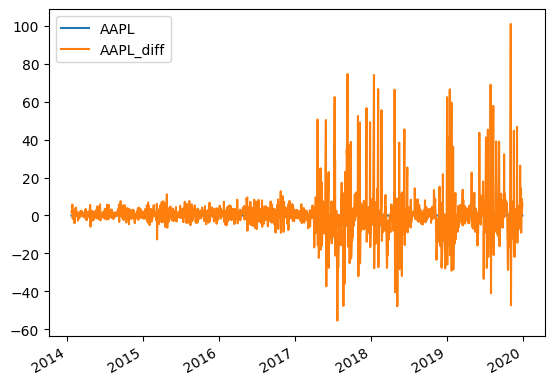

In [ ]:
Var_Apple_results.resid.plot()

assumption 2: testing that the coarianve matrix of the errors is postiive semi definite

assumption 3: testing for residual auto correlation

In [ ]:
Var_Apple_results.test_whiteness(14).summary()

Test statistic,Critical value,p-value,df
2.813,9.488,0.590,4


Testing for normally distributed data

In [ ]:
Var_Apple_results.test_normality().summary()

Test statistic,Critical value,p-value,df
1.876e+04,9.488,0.000,4


# Forecasting

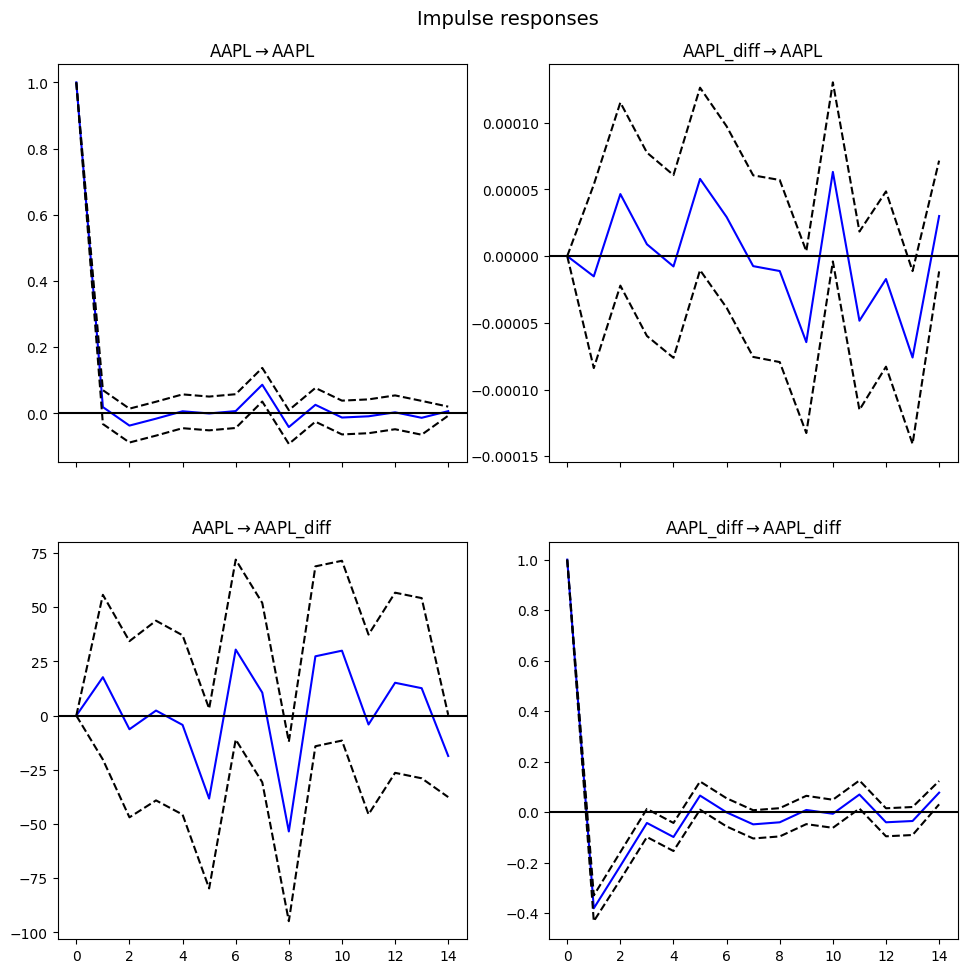

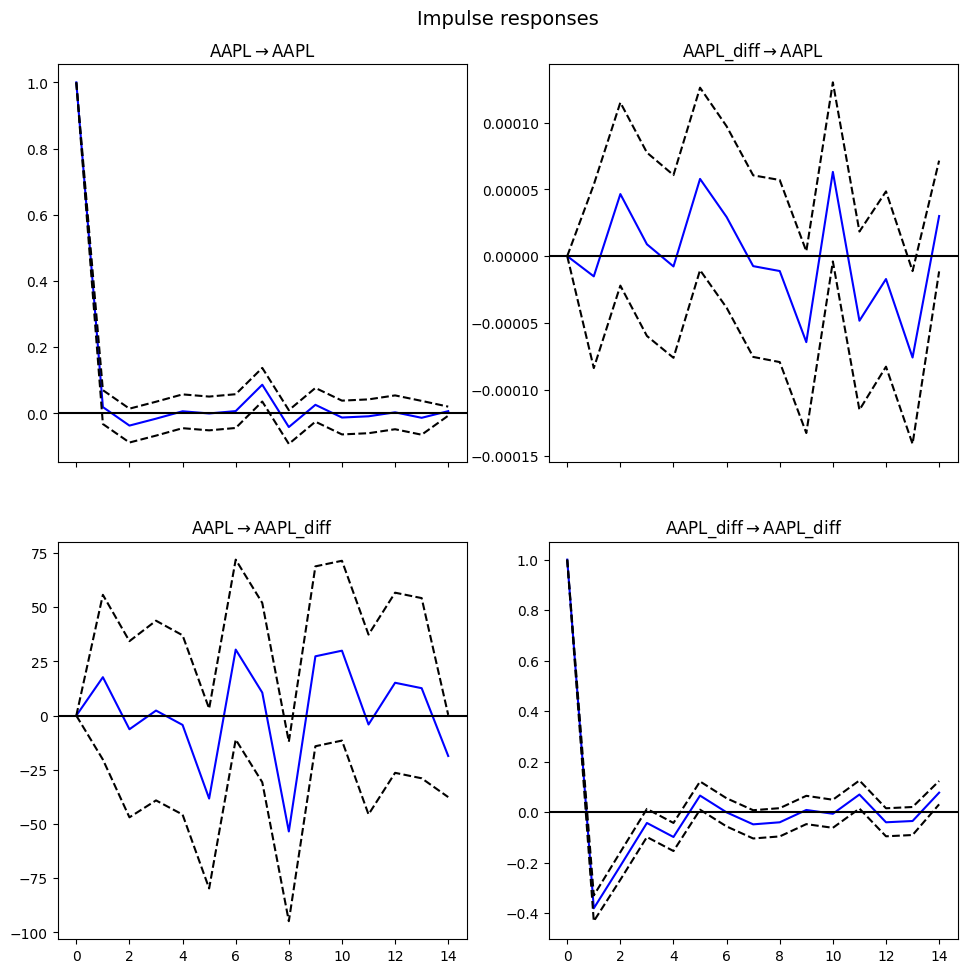

In [ ]:
Var_Apple_results.irf(14).plot()

In [ ]:
# last date in train set: 2019-12-30
# downloading testset


AAPL_stock_price_future = yf.Ticker("AAPL")
Ground_thuth_stockprice_21_days = pd.DataFrame(AAPL_stock_price_future.history(start = '2019-12-30', end = '2020-1-20')['Close'])

In [ ]:
# we save the value at 2019-12-30 as the initial price, this wil be needed to undo the transformation in order to do the forecasting

initial_value = Ground_thuth_stockprice_21_days.iloc[0,:]
print('initial_value', initial_value)
Ground_thuth_stockprice_21_days


initial_value Close    71.398895
Name: 2019-12-30 00:00:00-05:00, dtype: float64


,Close
Date,
2019-12-30 00:00:00-05:00,71.398895
2019-12-31 00:00:00-05:00,71.920570
2020-01-02 00:00:00-05:00,73.561523
2020-01-03 00:00:00-05:00,72.846367
2020-01-06 00:00:00-05:00,73.426826
2020-01-07 00:00:00-05:00,73.081497
2020-01-08 00:00:00-05:00,74.257095
2020-01-09 00:00:00-05:00,75.834381
2020-01-10 00:00:00-05:00,76.005836


In [ ]:
# since we have bank holidays, and other days on which no trading happens, we assume the model predicts the stock values on the day the market is open.
# thus, a ground thruth windows of 21 days will result in 14 effective days.

print(Ground_thuth_stockprice_21_days.index)
print(len(Ground_thuth_stockprice_21_days.index))

DatetimeIndex(['2019-12-30 00:00:00-05:00', '2019-12-31 00:00:00-05:00',
               '2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               '2020-01-16 00:00:00-05:00', '2020-01-17 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
14


In [ ]:
df_forecast = pd.DataFrame(Var_Apple_results.forecast(np.array(combined_df), 14))

# renaming columns of the forecast

df_forecast.columns = ['AAPL_stock_price', 'APPL_sentiment']

In [ ]:
initial_value[0]

71.39889526367188

In [ ]:


# recall AAPL stock prive is percent change, and APPL setiment is differences

# undoing the differencing of APPL_sentiment by taking the cumsum

df_forecast['APPL_sentiment'].cumsum(axis=0)

forecasted_prices_AAPL = df_forecast.assign(AAPL_stock_price_PCT_undone=df_forecast.AAPL_stock_price.pct_change(-1)+initial_value[0])




In [ ]:
Ground_thuth_stockprice_21_days.index

DatetimeIndex(['2019-12-30 00:00:00-05:00', '2019-12-31 00:00:00-05:00',
               '2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               '2020-01-16 00:00:00-05:00', '2020-01-17 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)

In [ ]:
#since we have bank holidays, and other days on which no trading happens, we assume the model predicts the stock values on the day the market is open.
# thus, a ground thruth windows of 21 days will result in 14 effective days.

forecasted_prices_AAPL['AAPL_stock_price_PCT_undone'].index = Ground_thuth_stockprice_21_days.index

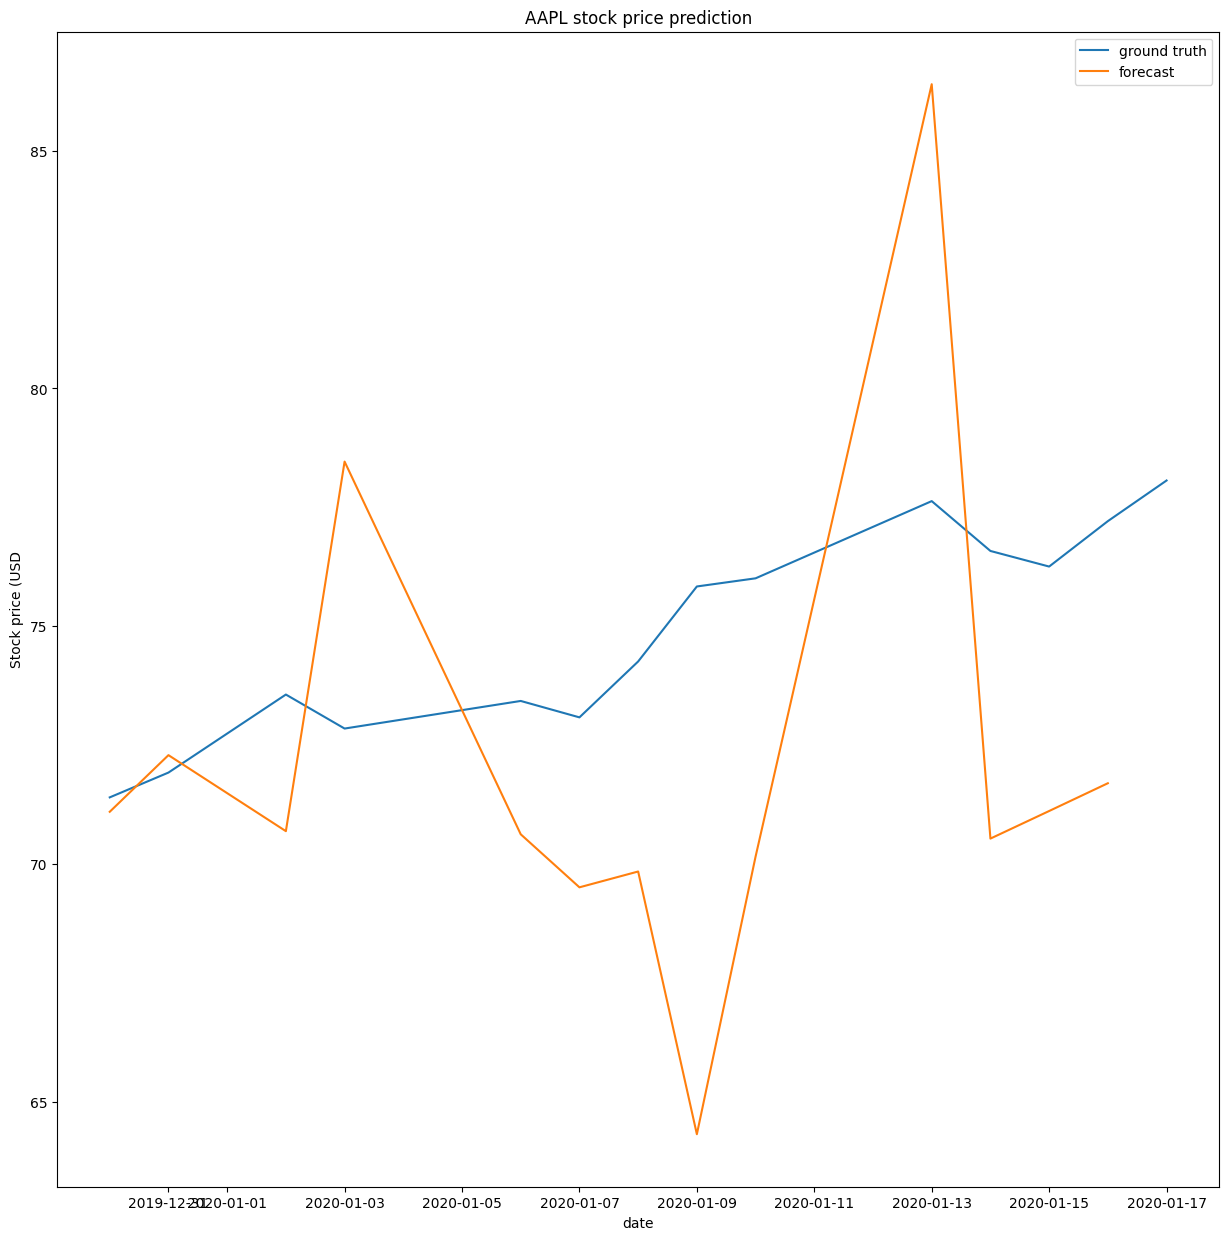

In [ ]:
plt.figure(figsize=(15,15))
plt.xlabel('date')
plt.ylabel('Stock price (USD')
# plt.figure(figsize=(15,15))
plt.plot(Ground_thuth_stockprice_21_days, label='ground truth')
plt.plot(forecasted_prices_AAPL['AAPL_stock_price_PCT_undone'], label='forecast')
plt.legend()
plt.title("AAPL stock price prediction")
plt.show()

We can see the forecast for one stock does not go very well.